<a href="https://colab.research.google.com/github/Swastik10b/AstroML/blob/main/AstroML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df= pd.read_csv("/content/6 class csv.csv")
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


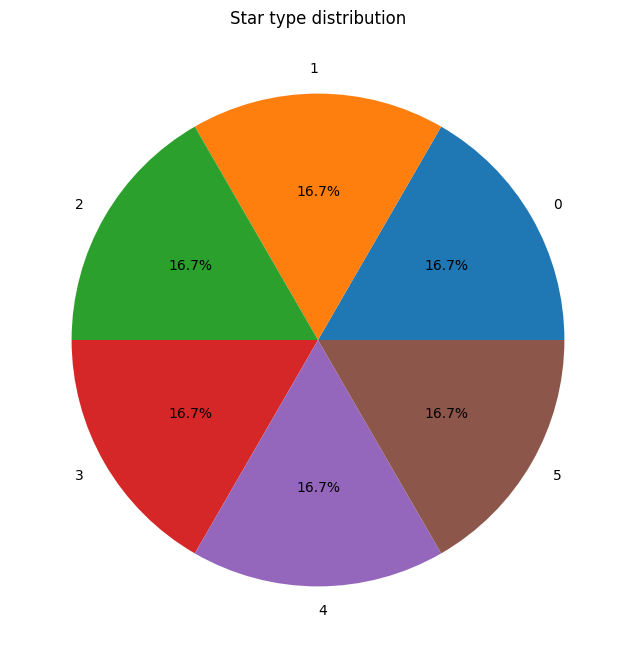

In [ ]:
# @title Star type distribution

import matplotlib.pyplot as plt

star_type_counts = df['Star type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(star_type_counts, labels=star_type_counts.index, autopct='%1.1f%%')
_ = plt.title('Star type distribution')

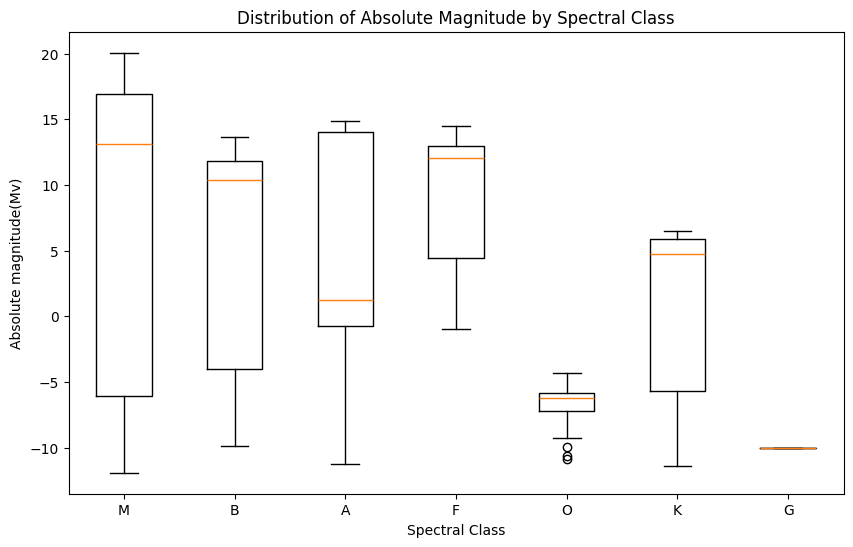

In [ ]:
# @title Distribution of Absolute Magnitude by Spectral Class

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot([df['Absolute magnitude(Mv)'][df['Spectral Class'] == cl] for cl in df['Spectral Class'].unique()], labels=df['Spectral Class'].unique())
plt.xlabel('Spectral Class')
plt.ylabel('Absolute magnitude(Mv)')
_ = plt.title('Distribution of Absolute Magnitude by Spectral Class')

In [ ]:
df.isnull().sum()


,0
Temperature (K),0
Luminosity(L/Lo),0
Radius(R/Ro),0
Absolute magnitude(Mv),0
Star type,0
Star color,0
Spectral Class,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assume df is your DataFrame
# Sample data for demonstration (replace this with your actual df)


# List of numerical columns and non-numerical columns
numerical_cols = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)',]
non_numerical_cols = ['Star type', 'Star color', 'Spectral Class']

# Check if the columns exist in the DataFrame
missing_cols = [col for col in non_numerical_cols if col not in df.columns]
if missing_cols:
    print(f"Warning: The following columns are missing from the DataFrame: {missing_cols}")

# Handle only the columns that are actually present in the DataFrame
non_numerical_cols = [col for col in non_numerical_cols if col in df.columns]

# Initialize scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Normalize and standardize numerical columns
df[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])
df[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])

# Combine numerical and non-numerical columns
df_combined = pd.concat([df[numerical_cols], df[non_numerical_cols]], axis=1)

print(df_combined)


     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0          -0.779382         -0.598624     -0.459210                1.116745   
1          -0.782110         -0.598624     -0.459241                1.162414   
2          -0.828477         -0.598624     -0.459342                1.362213   
3          -0.807496         -0.598624     -0.459229                1.167171   
4          -0.897819         -0.598624     -0.459340                1.491607   
..               ...               ...           ...                     ...   
235         2.983743          1.494720      2.167974               -1.361718   
236         2.133913          4.059319      1.854068               -1.428317   
237        -0.175029          2.403157      2.297800               -1.437832   
238        -0.132438          1.662878      1.695177               -1.485403   
239         2.872754          1.048345      2.995370               -1.159064   

     Star type Star color Spectral Clas

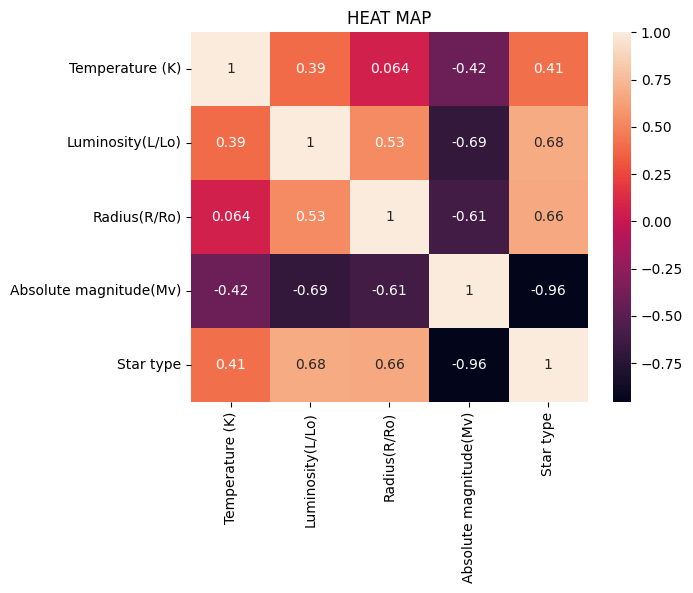

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# Assuming df_combined is already defined
df = df_combined

# Select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=[np.number])

# Create the heatmap for the correlation matrix
sb.heatmap(df_numeric.corr(), annot=True)

# Add a title to the heatmap
plt.title("HEAT MAP")

# Display the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X=df_numeric.drop(columns="Star type")
y=df_numeric["Star type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("Coefficient of determination (R^2 score):", r2_score(y_test, y_pred))

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean squared error: 0.18746732535288524
Coefficient of determination (R^2 score): 0.9307702007352063
Coefficients: [ 0.07445356 -0.03981429  0.2402133  -1.47928547]
Intercept: 2.4915646069782


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


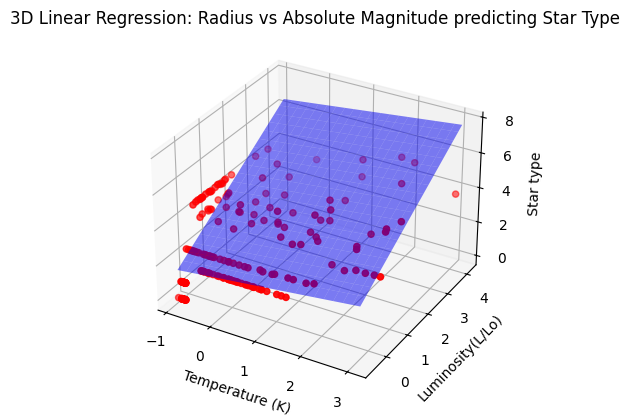

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Selecting the features: Radius and Absolute Magnitude
X = df_numeric[['Temperature (K)', 'Luminosity(L/Lo)']]
y = df_numeric['Star type']

# Scale the features (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_scaled, y)

# Create the mesh grid for plotting
x1_range = np.linspace(X['Temperature (K)'].min(), X['Temperature (K)'].max(), 100)
x2_range = np.linspace(X['Luminosity(L/Lo)'].min(), X['Luminosity(L/Lo)'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

# Scale the mesh grid values for Radius and Absolute Magnitude separately
x1_scaled = scaler.transform(np.c_[x1.ravel(), np.zeros_like(x1.ravel())])[:, 0]  # Scale x1 only (Radius)
x2_scaled = scaler.transform(np.c_[np.zeros_like(x2.ravel()), x2.ravel()])[:, 1]  # Scale x2 only (Absolute Magnitude)

# Predict values for the regression plane
x3 = model.intercept_ + model.coef_[0] * x1_scaled + model.coef_[1] * x2_scaled
x3 = x3.reshape(x1.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(X['Temperature (K)'], X['Luminosity(L/Lo)'], y, color='r', label='Actual data')

# Plot the regression plane
ax.plot_surface(x1, x2, x3, color='b', alpha=0.5, rstride=5, cstride=5)

# Labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Luminosity(L/Lo)')
ax.set_zlabel('Star type')
ax.set_title('3D Linear Regression: Radius vs Absolute Magnitude predicting Star Type')

# Show plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


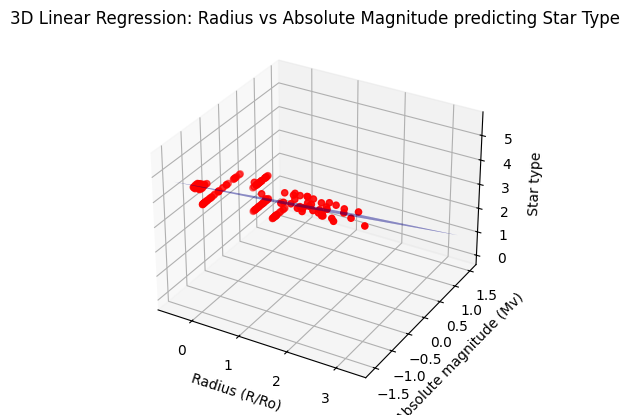

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Selecting the features: Radius and Absolute Magnitude
X = df_numeric[['Radius(R/Ro)', 'Absolute magnitude(Mv)']]
y = df_numeric['Star type']

# Scale the features (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_scaled, y)

# Create the mesh grid for plotting
x1_range = np.linspace(X['Radius(R/Ro)'].min(), X['Radius(R/Ro)'].max(), 100)
x2_range = np.linspace(X['Absolute magnitude(Mv)'].min(), X['Absolute magnitude(Mv)'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

# Scale the mesh grid values for Radius and Absolute Magnitude separately
x1_scaled = scaler.transform(np.c_[x1.ravel(), np.zeros_like(x1.ravel())])[:, 0]  # Scale x1 only (Radius)
x2_scaled = scaler.transform(np.c_[np.zeros_like(x2.ravel()), x2.ravel()])[:, 1]  # Scale x2 only (Absolute Magnitude)

# Predict values for the regression plane
x3 = model.intercept_ + model.coef_[0] * x1_scaled + model.coef_[1] * x2_scaled
x3 = x3.reshape(x1.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(X['Radius(R/Ro)'], X['Absolute magnitude(Mv)'], y, color='r', label='Actual data')

# Plot the regression plane
ax.plot_surface(x1, x2, x3, color='b', alpha=0.5, rstride=5, cstride=5)

# Labels and title
ax.set_xlabel('Radius (R/Ro)')
ax.set_ylabel('Absolute magnitude (Mv)')
ax.set_zlabel('Star type')
ax.set_title('3D Linear Regression: Radius vs Absolute Magnitude predicting Star Type')

# Show plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


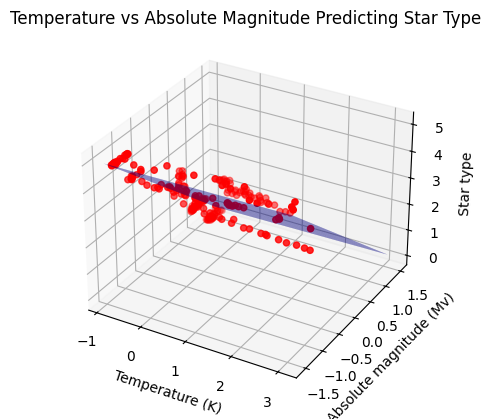

In [ ]:
# 1. Temperature vs Absolute Magnitude Predicting Star Type
X = df_numeric[['Temperature (K)', 'Absolute magnitude(Mv)']]
y = df_numeric['Star type']

# Scale and fit the model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

# Create the mesh grid
x1_range = np.linspace(X['Temperature (K)'].min(), X['Temperature (K)'].max(), 100)
x2_range = np.linspace(X['Absolute magnitude(Mv)'].min(), X['Absolute magnitude(Mv)'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

# Scale mesh grid
x1_scaled = scaler.transform(np.c_[x1.ravel(), np.zeros_like(x1.ravel())])[:, 0]
x2_scaled = scaler.transform(np.c_[np.zeros_like(x2.ravel()), x2.ravel()])[:, 1]

# Predict and reshape
x3 = model.intercept_ + model.coef_[0] * x1_scaled + model.coef_[1] * x2_scaled
x3 = x3.reshape(x1.shape)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Temperature (K)'], X['Absolute magnitude(Mv)'], y, color='r', label='Actual data')
ax.plot_surface(x1, x2, x3, color='b', alpha=0.5)
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Absolute magnitude (Mv)')
ax.set_zlabel('Star type')
ax.set_title('Temperature vs Absolute Magnitude Predicting Star Type')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


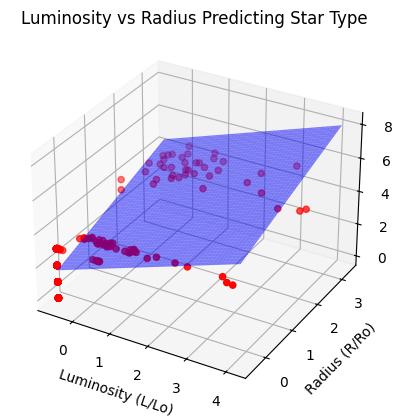

In [ ]:
# 2. Luminosity vs Radius Predicting Star Type
X = df_numeric[['Luminosity(L/Lo)', 'Radius(R/Ro)']]
y = df_numeric['Star type']

# Scale and fit the model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

# Create the mesh grid
x1_range = np.linspace(X['Luminosity(L/Lo)'].min(), X['Luminosity(L/Lo)'].max(), 100)
x2_range = np.linspace(X['Radius(R/Ro)'].min(), X['Radius(R/Ro)'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

# Scale mesh grid
x1_scaled = scaler.transform(np.c_[x1.ravel(), np.zeros_like(x1.ravel())])[:, 0]
x2_scaled = scaler.transform(np.c_[np.zeros_like(x2.ravel()), x2.ravel()])[:, 1]

# Predict and reshape
x3 = model.intercept_ + model.coef_[0] * x1_scaled + model.coef_[1] * x2_scaled
x3 = x3.reshape(x1.shape)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Luminosity(L/Lo)'], X['Radius(R/Ro)'], y, color='r', label='Actual data')
ax.plot_surface(x1, x2, x3, color='b', alpha=0.5)
ax.set_xlabel('Luminosity (L/Lo)')
ax.set_ylabel('Radius (R/Ro)')
ax.set_zlabel('Star type')
ax.set_title('Luminosity vs Radius Predicting Star Type')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


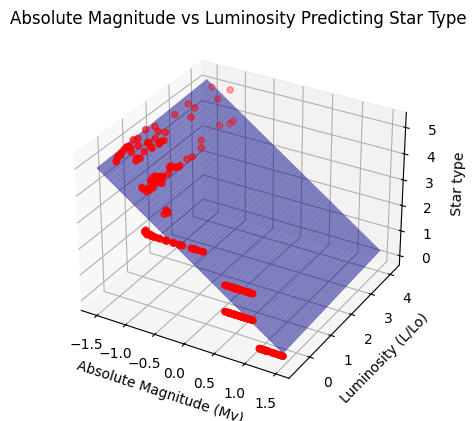

In [ ]:
# 3. Absolute Magnitude vs Luminosity Predicting Star Type
X = df_numeric[['Absolute magnitude(Mv)', 'Luminosity(L/Lo)']]
y = df_numeric['Star type']

# Scale and fit the model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

# Create the mesh grid
x1_range = np.linspace(X['Absolute magnitude(Mv)'].min(), X['Absolute magnitude(Mv)'].max(), 100)
x2_range = np.linspace(X['Luminosity(L/Lo)'].min(), X['Luminosity(L/Lo)'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

# Scale mesh grid
x1_scaled = scaler.transform(np.c_[x1.ravel(), np.zeros_like(x1.ravel())])[:, 0]
x2_scaled = scaler.transform(np.c_[np.zeros_like(x2.ravel()), x2.ravel()])[:, 1]

# Predict and reshape
x3 = model.intercept_ + model.coef_[0] * x1_scaled + model.coef_[1] * x2_scaled
x3 = x3.reshape(x1.shape)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Absolute magnitude(Mv)'], X['Luminosity(L/Lo)'], y, color='r', label='Actual data')
ax.plot_surface(x1, x2, x3, color='b', alpha=0.5)
ax.set_xlabel('Absolute Magnitude (Mv)')
ax.set_ylabel('Luminosity (L/Lo)')
ax.set_zlabel('Star type')
ax.set_title('Absolute Magnitude vs Luminosity Predicting Star Type')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


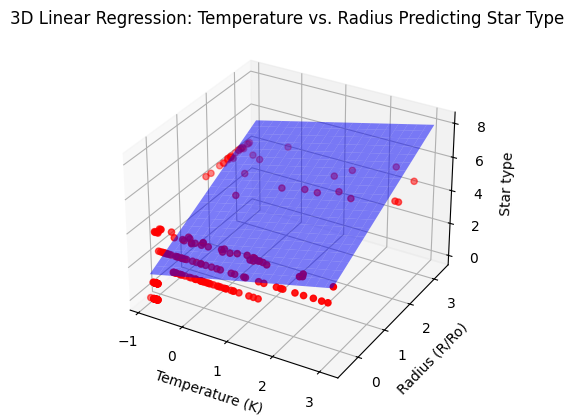

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Selecting the features and target
X = df_numeric[['Temperature (K)', 'Radius(R/Ro)']]  # Using Temperature and Radius as features
y = df_numeric['Star type']

# Scale the features (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_scaled, y)

# Create the mesh grid for plotting
x1_range = np.linspace(X['Temperature (K)'].min(), X['Temperature (K)'].max(), 100)
x2_range = np.linspace(X['Radius(R/Ro)'].min(), X['Radius(R/Ro)'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

# Scale the mesh grid values for Temperature and Radius separately
x1_scaled = scaler.transform(np.c_[x1.ravel(), np.zeros_like(x1.ravel())])[:, 0]  # Scale x1 (Temperature) only
x2_scaled = scaler.transform(np.c_[np.zeros_like(x2.ravel()), x2.ravel()])[:, 1]  # Scale x2 (Radius) only

# Predict values for the regression plane
x3 = model.intercept_ + model.coef_[0] * x1_scaled + model.coef_[1] * x2_scaled
x3 = x3.reshape(x1.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(X['Temperature (K)'], X['Radius(R/Ro)'], y, color='r', label='Actual data')

# Plot the regression plane
ax.plot_surface(x1, x2, x3, color='b', alpha=0.5, rstride=5, cstride=5)

# Labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Radius (R/Ro)')
ax.set_zlabel('Star type')
ax.set_title('3D Linear Regression: Temperature vs. Radius Predicting Star Type')

# Show plot
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


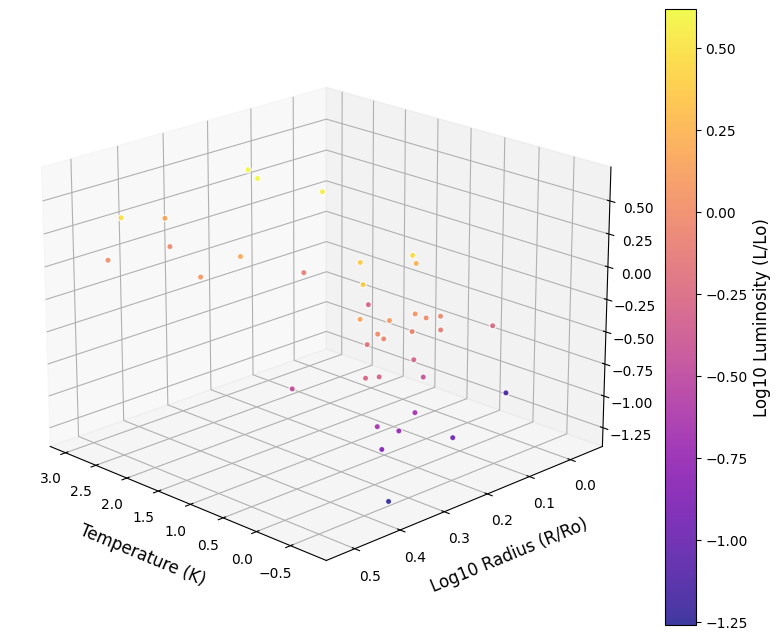

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Assuming `df` is already loaded with your data

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Apply logarithmic scales to radius and luminosity for better spread
df['Radius (R/Ro) Log'] = np.log10(df['Radius(R/Ro)'].replace(0, np.nan))
df['Luminosity (L/Lo) Log'] = np.log10(df['Luminosity(L/Lo)'].replace(0, np.nan))

# Filter out invalid values (if any)
df_filtered = df.dropna(subset=['Radius (R/Ro) Log', 'Luminosity (L/Lo) Log'])

# Plot data with logarithmic values for better visualization
sc = ax.scatter(
    df_filtered['Temperature (K)'],
    df_filtered['Radius (R/Ro) Log'],
    df_filtered['Luminosity (L/Lo) Log'],
    c=df_filtered['Luminosity (L/Lo) Log'],
    cmap='plasma',
    s=20,
    alpha=0.8,
    edgecolor='w'
)

# Labels
ax.set_xlabel('Temperature (K)', fontsize=12,labelpad=10)
ax.set_ylabel('Log10 Radius (R/Ro)', fontsize=12,labelpad=10)
ax.set_zlabel('Log10 Luminosity (L/Lo)', fontsize=12,labelpad=10)

# Color bar
cbar = plt.colorbar(sc)
cbar.set_label('Log10 Luminosity (L/Lo)', fontsize=12)

# Set a view angle for better visualization
ax.view_init(elev=20, azim=135)

# Show plot
plt.show()



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      0.88      0.93         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



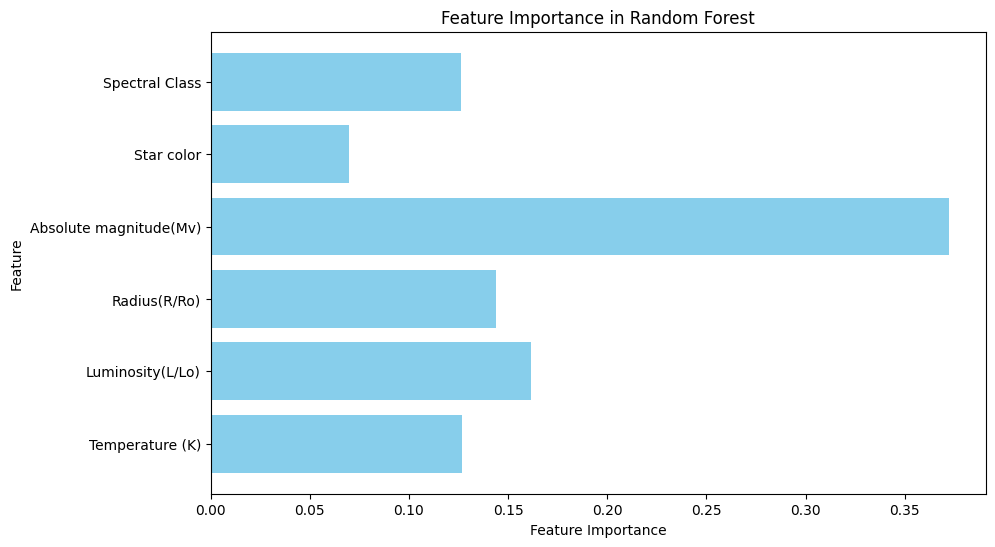

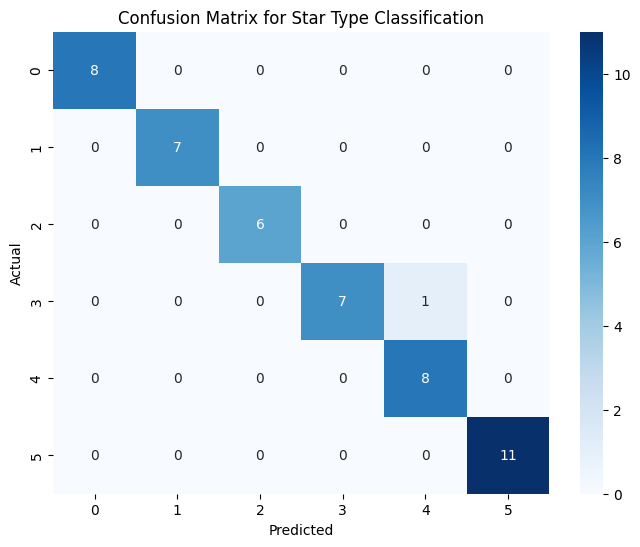

In [ ]:
import pandas as pd
import numpy as np
import sympy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the dataset
df = pd.read_csv("6 class csv.csv")

# Add Gaussian noise to numerical features to reduce accuracy
noise_factor = 0.15  # Adjust this to increase or decrease noise
df['Temperature (K)'] += noise_factor * np.random.normal(0, df['Temperature (K)'].std(), df.shape[0])
df['Luminosity(L/Lo)'] += noise_factor * np.random.normal(0, df['Luminosity(L/Lo)'].std(), df.shape[0])
df['Radius(R/Ro)'] += noise_factor * np.random.normal(0, df['Radius(R/Ro)'].std(), df.shape[0])
df['Absolute magnitude(Mv)'] += noise_factor * np.random.normal(0, df['Absolute magnitude(Mv)'].std(), df.shape[0])

# Encode the categorical features: 'Star color' and 'Spectral Class'
label_encoder_color = LabelEncoder()
df['Star color'] = label_encoder_color.fit_transform(df['Star color'])

label_encoder_spectral = LabelEncoder()
df['Spectral Class'] = label_encoder_spectral.fit_transform(df['Spectral Class'])

# Define the features (X) and the target (y)
X = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']]
y = df['Star type']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model

print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot Feature Importance
feature_importances = rf_classifier.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
unique_star_types = sorted(df['Star type'].unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_star_types, yticklabels=unique_star_types)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Star Type Classification")
plt.show()


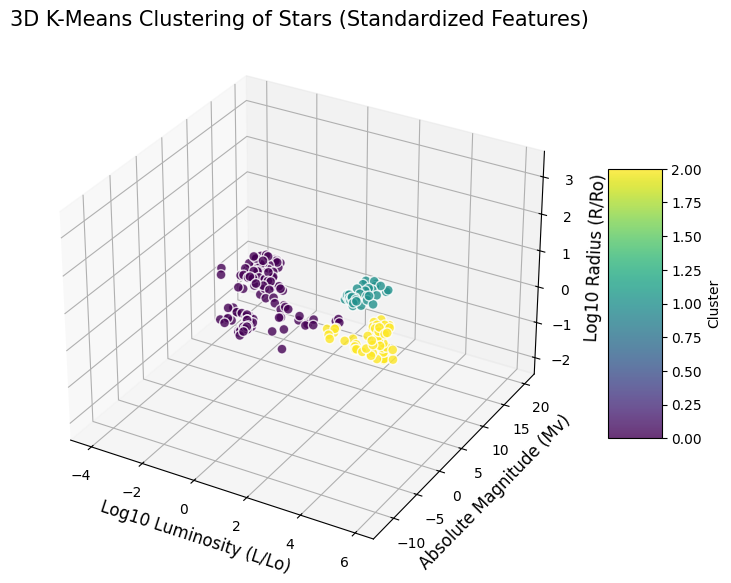

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the dataset
df = pd.read_csv("/content/6 class csv.csv")

# Extracting the features for clustering
features = ['Luminosity(L/Lo)', 'Absolute magnitude(Mv)', 'Radius(R/Ro)']

# Standardize the features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Perform KMeans Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Add logarithmic scaling for better visualization
df['Luminosity (L/Lo) Log'] = np.log10(df['Luminosity(L/Lo)'].replace(0, np.nan))
df['Radius (R/Ro) Log'] = np.log10(df['Radius(R/Ro)'].replace(0, np.nan))

# Remove invalid values for logarithmic scale
df_filtered = df.dropna(subset=['Luminosity (L/Lo) Log', 'Radius (R/Ro) Log'])

# 3D Plot of clusters using Luminosity, Absolute Magnitude, and Radius
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with Luminosity, Absolute Magnitude, and Radius for 3D representation
sc = ax.scatter(
    df_filtered['Luminosity (L/Lo) Log'],
    df_filtered['Absolute magnitude(Mv)'],
    df_filtered['Radius (R/Ro) Log'],
    c=df_filtered['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.8,
    edgecolor='w'
)

# Plot cluster centroids in scaled space and transform back to original space
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
centroids_log = np.log10(np.where(centroids[:, [0]] == 0, np.nan, centroids[:, [0]]))  # Replace 0 with NaN for log scale


# Labels for the axes
ax.set_xlabel('Log10 Luminosity (L/Lo)', fontsize=12)
ax.set_ylabel('Absolute Magnitude (Mv)', fontsize=12)
ax.set_zlabel('Log10 Radius (R/Ro)', fontsize=12)

# Color bar for clusters
cbar = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Cluster')

# Title for the plot
plt.title('3D K-Means Clustering of Stars (Standardized Features)', fontsize=15)

# Show plot with legend

plt.show()



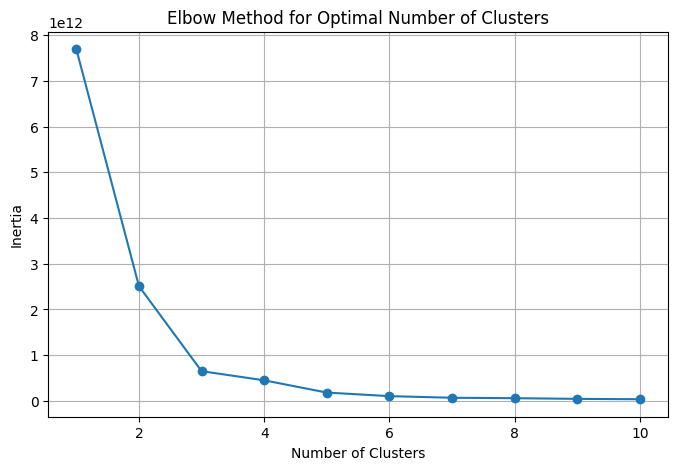

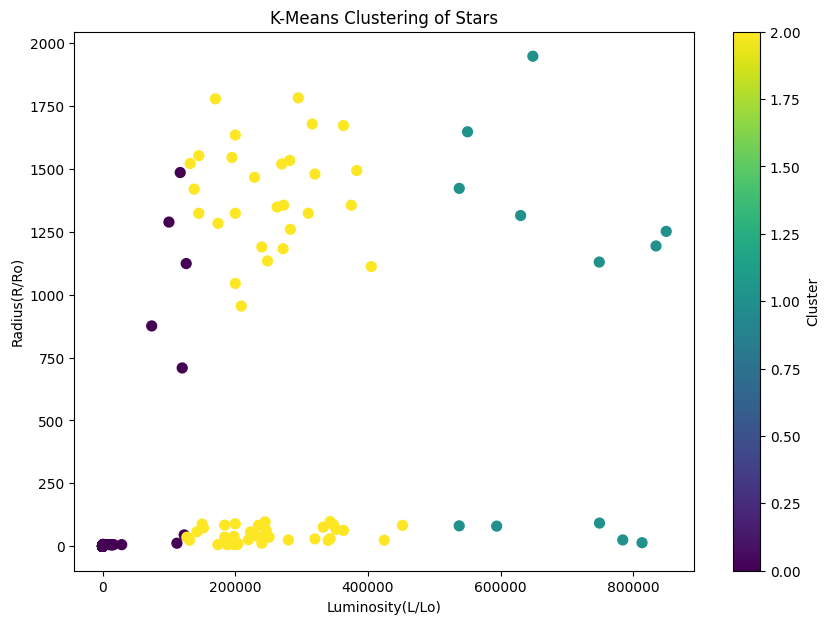

Enter Luminosity (L/Lo): 8775
Enter Radius (R/Ro): 877
The predicted cluster for the star is: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("6 class csv.csv")

# Extracting the features for clustering
X = df[['Luminosity(L/Lo)', 'Radius(R/Ro)']]

# Elbow Method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)  # Testing from 1 to 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

# Based on the elbow plot, choose the optimal number of clusters
optimal_clusters = 3  # Replace with the number chosen from the elbow plot

# Perform KMeans Clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# 2D Plot of clusters using Luminosity and Radius
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['Luminosity(L/Lo)'], df['Radius(R/Ro)'],
                      c=df['Cluster'], cmap='viridis', s=50)

# Labels for the axes
plt.xlabel('Luminosity(L/Lo)')
plt.ylabel('Radius(R/Ro)')

# Title for the plot
plt.title('K-Means Clustering of Stars')

# Show color bar
plt.colorbar(scatter, label='Cluster')

# Show plot
plt.show()

# Function for user prediction
def predict_cluster(luminosity, radius):
    """
    Predicts the cluster for a new star based on its Luminosity and Radius.

    Parameters:
    luminosity (float): Luminosity of the star (L/Lo)
    radius (float): Radius of the star (R/Ro)

    Returns:
    int: Predicted cluster label (0, 1, 2, ...)
    """
    new_star = np.array([[luminosity, radius]])  # Reshape the input as a 2D array
    cluster_label = kmeans.predict(new_star)  # Predict the cluster for the new star
    return cluster_label[0]  # Return the cluster label

# Example of predicting a new star's cluster
luminosity_input = float(input("Enter Luminosity (L/Lo): "))
radius_input = float(input("Enter Radius (R/Ro): "))

predicted_cluster = predict_cluster(luminosity_input, radius_input)
print(f"The predicted cluster for the star is: {predicted_cluster}")


['red' 'blue-white' 'white' 'yellowish-white' 'pale-yellow-orange' 'blue'
 'whitish' 'yellow-white' 'orange' 'white-yellow' 'yellowish' 'orange-red']


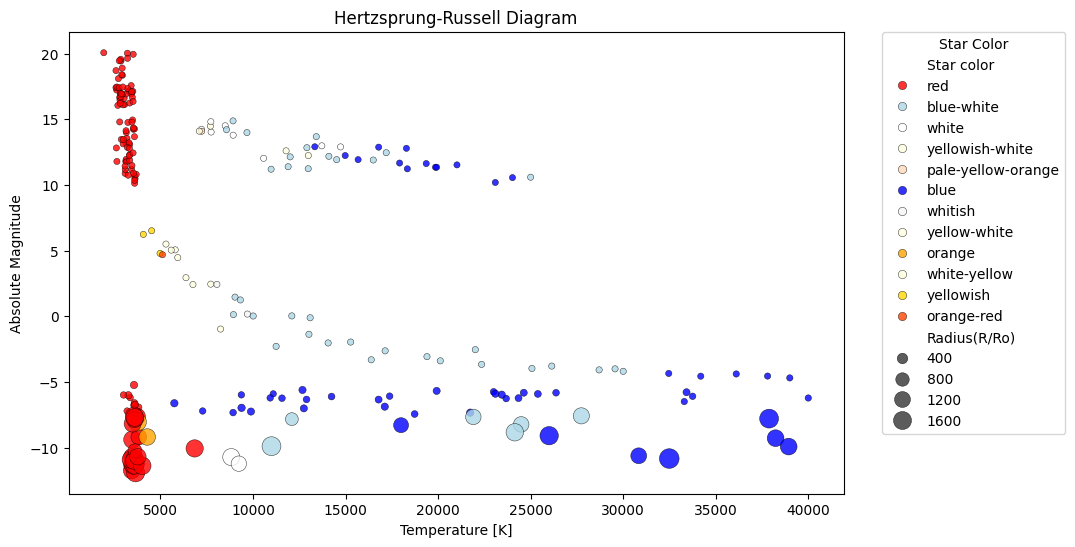

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
stars = pd.read_csv("/content/6 class csv.csv")

# Clean the 'Star color' column (replace spaces with hyphens and convert to lowercase)
stars['Star color'] = stars['Star color'].str.replace(r"([A-Za-z])\s([A-Za-z])", r"\1-\2", regex=True)
stars['Star color'] = stars['Star color'].str.strip().str.lower()

# Unique star colors after cleaning
print(stars['Star color'].unique())

# Define the color mapping for the stars
color_mapping = {
    'red': '#FF0000',
    'blue-white': '#ADD8E6',
    'white': '#FFFFFF',
    'yellowish-white': '#FFFFE0',
    'pale-yellow-orange': '#FFDAB9',
    'blue': '#0000FF',
    'whitish': '#F5F5F5',
    'yellow-white': '#FFFFE0',
    'orange': '#FFA500',
    'white-yellow': '#FFFFE0',
    'yellowish': '#FFD700',
    'orange-red': '#FF4500'
}

# Map the star colors to the specified colors
stars['Color'] = stars['Star color'].map(color_mapping)

# Plotting the Hertzsprung-Russell Diagram
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=stars,
    x='Temperature (K)',
    y='Absolute magnitude(Mv)',
    hue='Star color',  # Color based on star color
    palette=color_mapping,  # Using the defined color palette
    size='Radius(R/Ro)',  # Size based on radius
    sizes=(20, 200),  # Size range for points
    edgecolor='k',  # Black edge color for points
    alpha=0.8       # Transparency for better visualization
)



# Adding labels and title
plt.xlabel('Temperature [K]')
plt.ylabel('Absolute Magnitude')
plt.title('Hertzsprung-Russell Diagram')

# Adding legend for the star colors
plt.legend(title='Star Color', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.show()


<ipython-input-19-d54c17d0262e>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stars['Star type'].fillna('unknown', inplace=True)


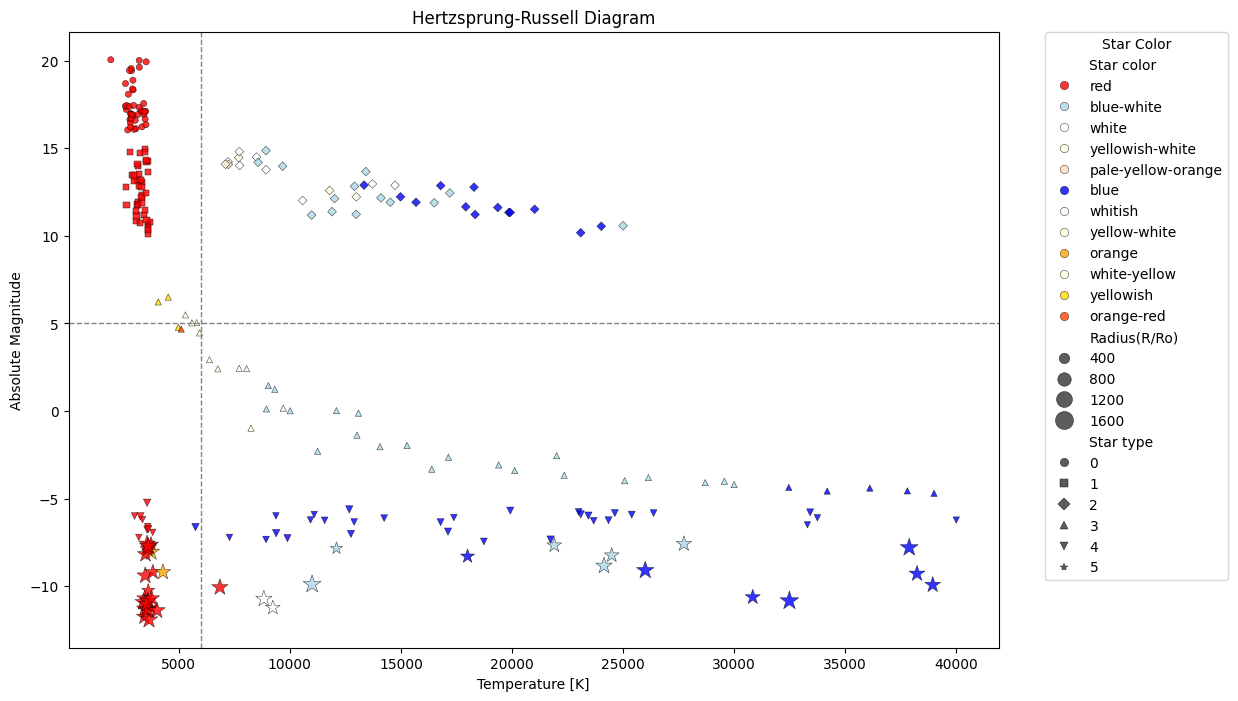

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
stars = pd.read_csv("/content/6 class csv.csv")

# Clean the 'Star color' column (replace spaces with hyphens and convert to lowercase)
stars['Star color'] = stars['Star color'].str.replace(r"([A-Za-z])\s([A-Za-z])", r"\1-\2", regex=True)
stars['Star color'] = stars['Star color'].str.strip().str.lower()

# Define the color mapping for the stars
color_mapping = {
    'red': '#FF0000',
    'blue-white': '#ADD8E6',
    'white': '#FFFFFF',
    'yellowish-white': '#FFFFE0',
    'pale-yellow-orange': '#FFDAB9',
    'blue': '#0000FF',
    'whitish': '#F5F5F5',
    'yellow-white': '#FFFFE0',
    'orange': '#FFA500',
    'white-yellow': '#FFFFE0',
    'yellowish': '#FFD700',
    'orange-red': '#FF4500'
}

# Define the marker mapping for the star types
marker_mapping = {
    0: 'o',
    1: 's',
    2: 'D',
    3: '^',
    4: 'v',
    5: '*'
}

# Clean or prepare the 'Star type' column
stars['Star type'].fillna('unknown', inplace=True)

# Map the star colors to the specified colors
stars['Color'] = stars['Star color'].map(color_mapping)
# Map the star types to the specified markers
stars['Marker'] = stars['Star type'].map(marker_mapping)

# Plotting the Hertzsprung-Russell Diagram
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=stars,
    x='Temperature (K)',
    y='Absolute magnitude(Mv)',
    hue='Star color',  # Color based on star color
    palette=color_mapping,  # Using the defined color palette
    style='Star type',  # Shape based on star type
    markers=marker_mapping,  # Using the defined marker shapes
    size='Radius(R/Ro)',  # Size based on radius
    sizes=(20, 200),  # Size range for points
    edgecolor='k',  # Black edge color for points
    alpha=0.8       # Transparency for better visualization
)

# Adding separation lines to divide dwarfs, main sequence, and giants
plt.axhline(y=5, color='gray', linestyle='--', linewidth=1)  # Example separation line for dwarfs
plt.axvline(x=6000, color='gray', linestyle='--', linewidth=1)  # Example separation line for giants

# Adding labels and title
plt.xlabel('Temperature [K]')
plt.ylabel('Absolute Magnitude')
plt.title('Hertzsprung-Russell Diagram')

# Adding legend
plt.legend(title='Star Color', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Display the plot
plt.show()


<ipython-input-20-5c2ceba6916a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_sequence_stars['Mass (M/Mo)'] = main_sequence_stars['Luminosity(L/Lo)']**(1 / a(main_sequence_stars['Luminosity(L/Lo)']))
<ipython-input-20-5c2ceba6916a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_sequence_stars['Mass (kg)'] = main_sequence_stars['Mass (M/Mo)'] * M_sun
<ipython-input-20-5c2ceba6916a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

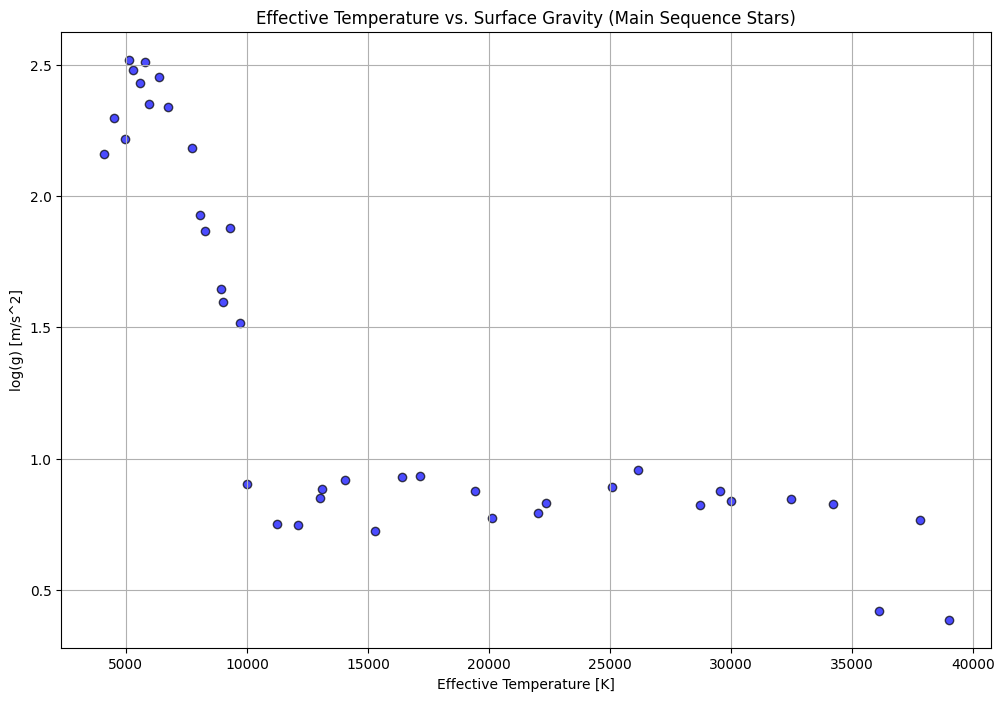

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.674 * 10**(-11)  # Gravitational constant in m^3 kg^-1 s^-2
L_sun = 3.828 * 10**26  # Solar luminosity in watts
M_sun = 1.989 * 10**30  # Solar mass in kg
R_sun = 6.957 * 10**8   # Solar radius in meters
sigma = 5.67 * 10**(-8) # Stefan-Boltzmann constant in W m^-2 K^-4

# Load your data
stars = pd.read_csv("/content/6 class csv.csv")

# Filter for main sequence stars (assuming 'Star type' indicates this; adjust as needed)
# Here, I'm assuming main sequence stars are labeled with '0', but adjust as necessary
main_sequence_stars = stars[stars['Star type'] == 3]

# Define the function for a(M)
def a(M):
    return -141.7 * M**4 + 232.4 * M**3 - 129.1 * M**2 + 33.29 * M + 0.215

# Calculate Mass (M) from Luminosity (L/Lo)
main_sequence_stars['Mass (M/Mo)'] = main_sequence_stars['Luminosity(L/Lo)']**(1 / a(main_sequence_stars['Luminosity(L/Lo)']))

# Convert Mass to kg
main_sequence_stars['Mass (kg)'] = main_sequence_stars['Mass (M/Mo)'] * M_sun

# Convert Radius to meters
main_sequence_stars['Radius (m)'] = main_sequence_stars['Radius(R/Ro)'] * R_sun

# Calculate Surface Gravity (g)
main_sequence_stars['Surface Gravity (m/s^2)'] = (G * main_sequence_stars['Mass (kg)']) / (main_sequence_stars['Radius (m)']**2)
main_sequence_stars['log(g)'] = np.log10(main_sequence_stars['Surface Gravity (m/s^2)'])

# Plot Effective Temperature vs. Surface Gravity for main sequence stars
plt.figure(figsize=(12, 8))
plt.scatter(main_sequence_stars['Temperature (K)'], main_sequence_stars['log(g)'], c='blue', alpha=0.7, edgecolor='k')
plt.xlabel('Effective Temperature [K]')
plt.ylabel('log(g) [m/s^2]')
plt.title('Effective Temperature vs. Surface Gravity (Main Sequence Stars)')
plt.grid(True)
plt.show()


<ipython-input-21-157e50cc0bf3>:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_prime_factors = df_rounded.applymap(distinct_prime_factors)


DataFrame with Distinct Prime Factors:
     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)
0                  3                 0             0                       1
1                  3                 0             0                       1
2                  3                 0             0                       1
3                  3                 0             0                       1
4                  2                 0             0                       2
..               ...               ...           ...                     ...
235                5                 3             3                       0
236                1                 4             3                       0
237                2                 3             1                       0
238                2                 5             2                       0
239                4                 4             1                       0

[240 rows x 4 columns]


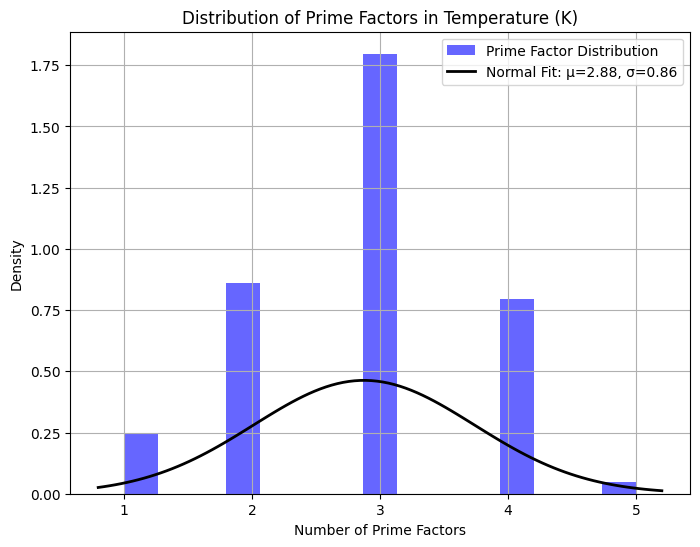

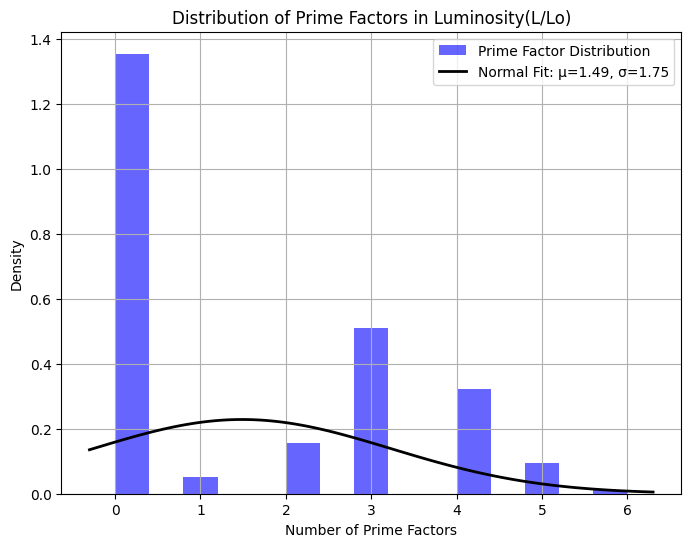

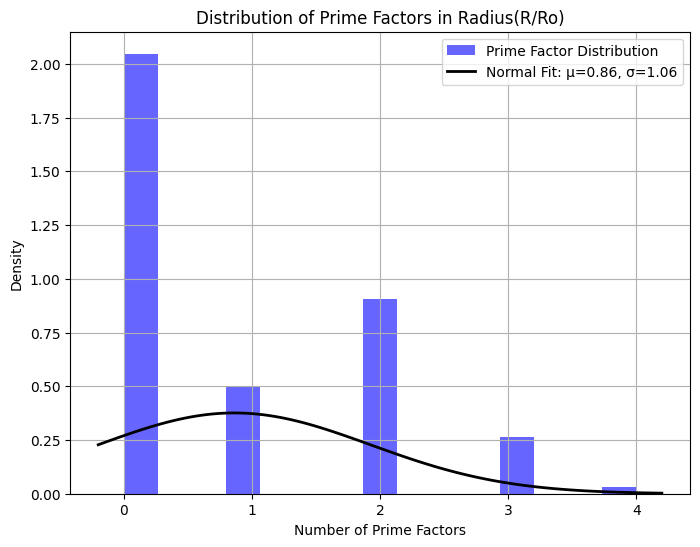

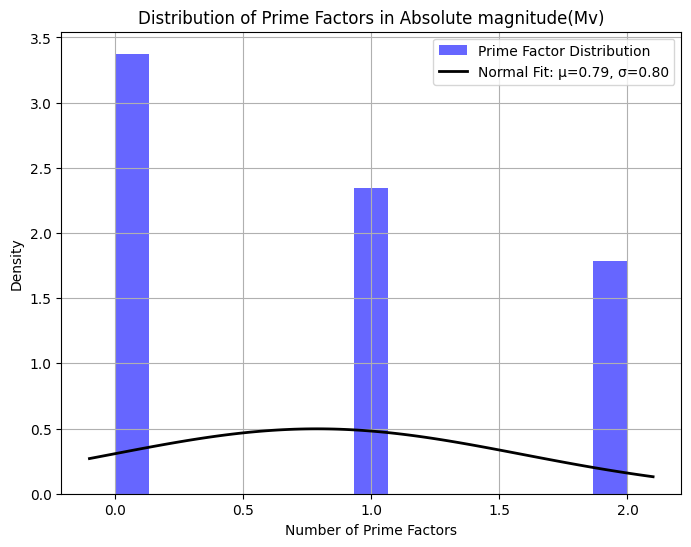

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import primefactors
from scipy.stats import norm

# Assuming df is the DataFrame containing your dataset
# Rounding columns to the nearest integers
df_rounded = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].round().astype(int)
# Function to calculate distinct prime factors
def distinct_prime_factors(n):
    if n > 1:
        return len(primefactors(n))
    else:
        return 0

# Applying prime factorization to the entire DataFrame
df_prime_factors = df_rounded.applymap(distinct_prime_factors)

# Print the DataFrame with distinct prime factors
print("DataFrame with Distinct Prime Factors:")
print(df_prime_factors)

# Step 3: Plot the Distribution of Prime Factors
columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']

for col in columns:
    plt.figure(figsize=(8, 6))

    # Plot histogram of the number of distinct prime factors for the column
    prime_factors_data = df_prime_factors[col]
    plt.hist(prime_factors_data, bins=15, density=True, alpha=0.6, color='b', label='Prime Factor Distribution')

    # Fit a normal distribution to the data
    mu, std = norm.fit(prime_factors_data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    # Plot the normal distribution for comparison
    plt.plot(x, p, 'k', linewidth=2, label=f'Normal Fit: μ={mu:.2f}, σ={std:.2f}')

    plt.title(f"Distribution of Prime Factors in {col}")
    plt.xlabel('Number of Prime Factors')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

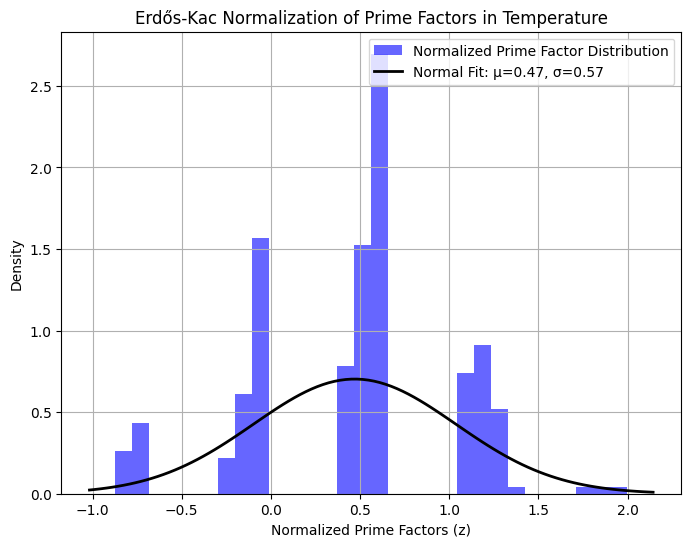

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import primefactors
from scipy.stats import norm

# Assuming df_rounded is the DataFrame with rounded values from previous step
temperature_data = df_rounded['Temperature (K)']

# Function to calculate the number of distinct prime factors
def distinct_prime_factors(n):
    if n > 1:
        return len(primefactors(n))
    else:
        return 0

# Apply prime factorization to the Temperature (K) column
temperature_prime_factors = temperature_data.apply(distinct_prime_factors)

# Apply the Erdős-Kac theorem normalization
def erdos_kac_normalization(n, prime_factors_count):
    if n > 1 and np.log(np.log(n)) > 0:  # Ensure log(log(n)) is positive
        return (prime_factors_count - np.log(np.log(n))) / np.sqrt(np.log(np.log(n)))
    else:
        return 0  # Avoid undefined cases for very small n

# Normalize the number of prime factors for each temperature value
normalized_prime_factors = [
    erdos_kac_normalization(temp, pf_count)
    for temp, pf_count in zip(temperature_data, temperature_prime_factors)
]

# Remove zero entries (which are undefined for Erdős-Kac)
normalized_prime_factors = [z for z in normalized_prime_factors if z != 0]

# Plotting the normalized distribution
plt.figure(figsize=(8, 6))
plt.hist(normalized_prime_factors, bins=30, density=True, alpha=0.6, color='b', label='Normalized Prime Factor Distribution')

# Fit a normal distribution for comparison
mu, std = norm.fit(normalized_prime_factors)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the normal distribution curve
plt.plot(x, p, 'k', linewidth=2, label=f'Normal Fit: μ={mu:.2f}, σ={std:.2f}')

# Labels and title
plt.title("Erdős-Kac Normalization of Prime Factors in Temperature")
plt.xlabel('Normalized Prime Factors (z)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from fractions import Fraction
from itertools import chain

# Continued fraction representation helper function
def continued_fraction(x, max_iter=100):
    """Returns the continued fraction expansion of a number"""
    cf = []
    while x % 1 != 0 and len(cf) < max_iter:
        integer_part = int(x)
        cf.append(integer_part)
        x = 1 / (x - integer_part)
    cf.append(int(x))
    return cf

# Load the dataset (assuming the dataset is loaded as 'df')
df = pd.read_csv('/content/6 class csv.csv')

# Apply continued fraction analysis for the 'Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', and 'Absolute magnitude (Mv)' columns
columns_to_analyze = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']

# Add continued fraction coefficients columns
for col in columns_to_analyze:
    df[f'Continued Fraction Coefficients ({col})'] = df[col].apply(lambda x: continued_fraction(x))

# Function to analyze the combined coefficients for each column
def analyze_coefficients_per_column(column_name):
    """Analyzes the continued fraction coefficients for a specific column"""
    print(f"Analyzing {column_name}:")

    # Extract continued fraction coefficients for this column
    all_coefficients = list(chain.from_iterable(df[f'Continued Fraction Coefficients ({column_name})']))


    # Total number of coefficients
    print(f"Total Number of Coefficients: {len(all_coefficients)}")

    # Check for repeated sequences or periodicity in combined coefficients
    unique_coeffs = set(all_coefficients)
    if len(unique_coeffs) < len(all_coefficients):
        print(f"Possible overall periodic pattern found in {column_name}.")
    else:
        print(f"No obvious overall periodic pattern in {column_name}.")
    print("-" * 50)

# Apply analysis to each column
for col in columns_to_analyze:
    analyze_coefficients_per_column(col)

Analyzing Temperature (K):
Total Number of Coefficients: 240
Possible overall periodic pattern found in Temperature (K).
--------------------------------------------------
Analyzing Luminosity(L/Lo):
Total Number of Coefficients: 11710
Possible overall periodic pattern found in Luminosity(L/Lo).
--------------------------------------------------
Analyzing Radius(R/Ro):
Total Number of Coefficients: 14464
Possible overall periodic pattern found in Radius(R/Ro).
--------------------------------------------------
Analyzing Absolute magnitude(Mv):
Total Number of Coefficients: 21160
Possible overall periodic pattern found in Absolute magnitude(Mv).
--------------------------------------------------


Autocorrelation analysis for Temperature (K):


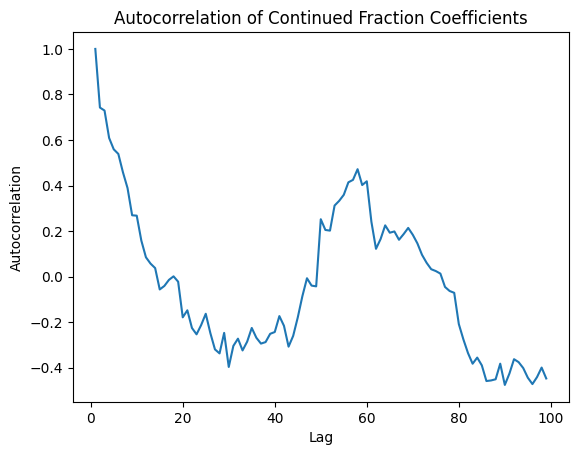

--------------------------------------------------
Autocorrelation analysis for Luminosity(L/Lo):


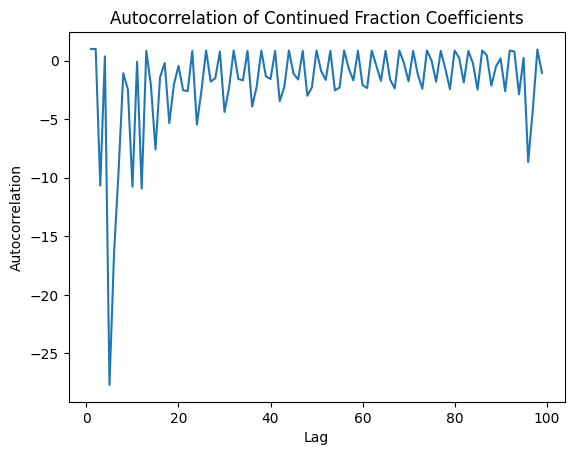

--------------------------------------------------
Autocorrelation analysis for Radius(R/Ro):


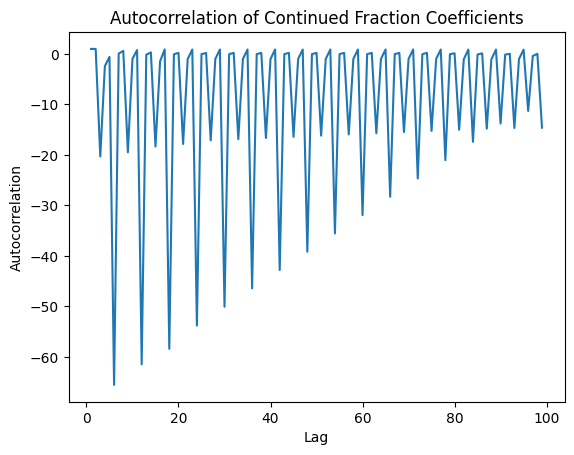

--------------------------------------------------
Autocorrelation analysis for Absolute magnitude(Mv):


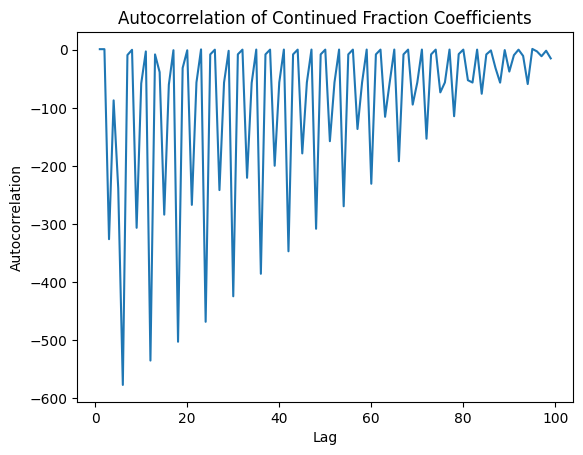

--------------------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def autocorrelation_analysis(coefficients, max_lag=100):
    """Performs autocorrelation analysis to detect periodicity."""
    coefficients = np.array(coefficients)
    n = len(coefficients)
    mean = np.mean(coefficients)
    autocorr = [np.correlate(coefficients - mean, np.roll(coefficients - mean, lag))[0] for lag in range(1, max_lag)]
    autocorr /= autocorr[0]  # Normalize

    # Plot the autocorrelation
    plt.plot(range(1, max_lag), autocorr)
    plt.title("Autocorrelation of Continued Fraction Coefficients")
    plt.xlabel("Lag")
    plt.ylabel("Autocorrelation")
    plt.show()

# Apply autocorrelation analysis to each column's coefficients
for col in columns_to_analyze:
    print(f"Autocorrelation analysis for {col}:")
    all_coefficients = list(chain.from_iterable(df[f'Continued Fraction Coefficients ({col})']))
    autocorrelation_analysis(all_coefficients)
    print("-" * 50)

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
# Replace 'dataset.csv' with your actual file path
data = pd.read_csv('6 class csv.csv')

# Filter for Main Sequence stars
main_sequence_temps = data[data['Star type'] == 3]['Temperature (K)']

# Check if there are Main Sequence stars in the dataset
if main_sequence_temps.empty:
    raise ValueError("No Main Sequence stars found in the dataset.")

# Define bootstrap parameters
num_bootstrap_samples = 1000  # Number of bootstrap samples
confidence_level = 0.95       # Confidence level for the interval

# Perform bootstrap resampling
bootstrap_means = []
np.random.seed(0)  # For reproducibility

for _ in range(num_bootstrap_samples):
    sample = np.random.choice(main_sequence_temps, size=len(main_sequence_temps), replace=True)
    bootstrap_means.append(np.mean(sample))

# Convert to numpy array for convenience
bootstrap_means = np.array(bootstrap_means)

# Calculate the confidence interval
lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)

# Print the results
print(f"Bootstrap Confidence Interval for the Mean Temperature of Main Sequence Stars:")
print(f"{confidence_level*100}% Confidence Interval: ({lower_bound:.2f} K, {upper_bound:.2f} K)")

Bootstrap Confidence Interval for the Mean Temperature of Main Sequence Stars:
95.0% Confidence Interval: (12649.16 K, 19576.43 K)


In [ ]:
import pandas as pd
import numpy as np
from sympy import primefactors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Load the dataset (update the path accordingly)
df = pd.read_csv('/content/6 class csv.csv')

# Check the column names to confirm they are correctly loaded
print(df.columns)

# Function to calculate the number of distinct prime factors
def distinct_prime_factors(n):
    if n > 1:
        return len(primefactors(n))
    else:
        return 0

# Add a new column for the number of prime factors of Temperature (K)
df['Prime Factors Count'] = df['Temperature (K)'].apply(lambda x: distinct_prime_factors(int(x)))

# Encode the categorical features 'Star color' and 'Spectral Class' using LabelEncoder
le_color = LabelEncoder()
df['Star Color Encoded'] = le_color.fit_transform(df['Star color'])

le_spectral = LabelEncoder()
df['Spectral Class Encoded'] = le_spectral.fit_transform(df['Spectral Class'])

# Define the feature set (X) and target (y)
# Features include Temperature, Luminosity, Radius, Absolute Magnitude, Prime Factors, Star Color, and Spectral Class
features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)',
            'Prime Factors Count', 'Star Color Encoded', 'Spectral Class Encoded']

X = df[features]  # Features
y = df['Star type']  # Target is the 'Star type' column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
star_type_mapping = {
    0: 'Brown Dwarf',
    1: 'Red Dwarf',
    2: 'White Dwarf',
    3: 'Main Sequence',
    4: 'Supergiant',
    5: 'Hypergiant'
}
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=list(star_type_mapping.values())))

# User input function to predict star type based on user input
def predict_star_type():
    try:
        # User input for the star's properties
        temp = float(input("Enter the surface temperature (in K): "))
        luminosity = float(input("Enter the Luminosity (L/Lo): "))
        radius = float(input("Enter the Radius (R/Ro): "))
        magnitude = float(input("Enter the Absolute Magnitude (Mv): "))
        star_color = input(f"Enter the Star Color (choose from {list(le_color.classes_)}): ")
        spectral_class = input(f"Enter the Spectral Class (choose from {list(le_spectral.classes_)}): ")

        # Convert star color and spectral class to encoded values
        star_color_encoded = le_color.transform([star_color])[0]
        spectral_class_encoded = le_spectral.transform([spectral_class])[0]

        # Calculate the number of distinct prime factors for the temperature
        prime_factors_count = distinct_prime_factors(int(temp))

        # Create a feature array for the model to predict
        feature_array = [[temp, luminosity, radius, magnitude, prime_factors_count, star_color_encoded, spectral_class_encoded]]

        # Predict the star type
        prediction = clf.predict(feature_array)[0]
        predicted_star_type = star_type_mapping[prediction]

        print(f"Predicted Star Type: {predicted_star_type}")
    except ValueError as e:
        print(f"Invalid input: {e}")

# Call the user prediction function
predict_star_type()


Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')
Model Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
    Red Dwarf       1.00      1.00      1.00         7
  White Dwarf       1.00      1.00      1.00         6
Main Sequence       1.00      1.00      1.00         8
   Supergiant       1.00      1.00      1.00         8
   Hypergiant       1.00      1.00      1.00        11

     accuracy                           1.00        48
    macro avg       1.00      1.00      1.00        48
 weighted avg       1.00      1.00      1.00        48

Enter the surface temperature (in K): 7698
Enter the Luminosity (L/Lo): 876897
Enter the Radius (R/Ro): 987
Enter the Absolute Magnitude (Mv): 8786
Enter the Star Color (choose from ['Blue', 'Blue ', 'Blue White', 'Blue white', 'Blue wh

Unique Star Types: [0 1 2 3 4 5]


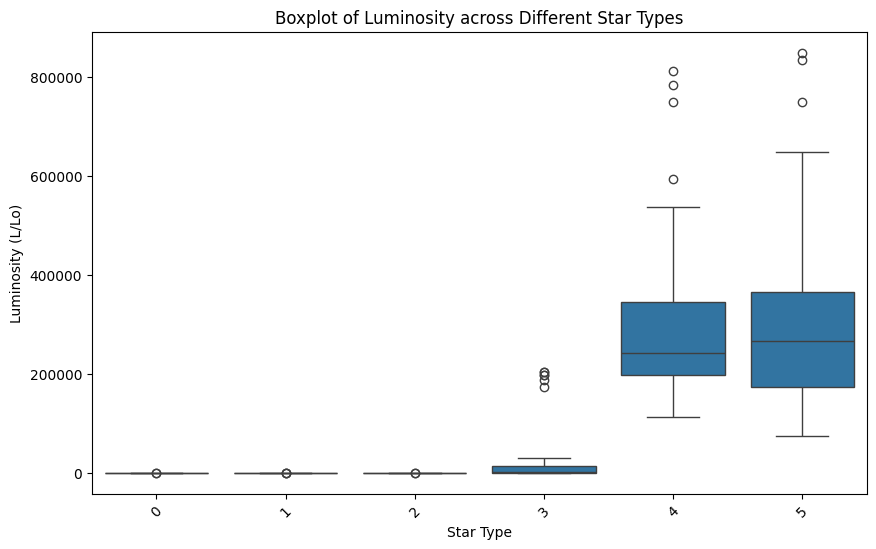

ANOVA F-statistic: 75.60253332086626
ANOVA p-value: 6.643273871281763e-47
There is a significant difference in Luminosity between different Star types.


In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/6 class csv.csv")

# Display unique star types for reference
print("Unique Star Types:", df['Star type'].unique())

# Boxplot to visualize the distribution of Luminosity across different Star types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Star type', y='Luminosity(L/Lo)', data=df)
plt.title('Boxplot of Luminosity across Different Star Types')
plt.xlabel('Star Type')
plt.ylabel('Luminosity (L/Lo)')
plt.xticks(rotation=45)
plt.show()

# Perform One-Way ANOVA
# Extracting Luminosity values for each Star type group
star_type_groups = [group['Luminosity(L/Lo)'].values for name, group in df.groupby('Star type')]

# ANOVA test
f_statistic, p_value = stats.f_oneway(*star_type_groups)

# Print the results
print(f"ANOVA F-statistic: {f_statistic:}")
print(f"ANOVA p-value: {p_value:}")

# Conclusion
if p_value < 0.05:
    print("There is a significant difference in Luminosity between different Star types.")
else:
    print("There is no significant difference in Luminosity between different Star types.")


Unique Star Types: [0 1 2 3 4 5]


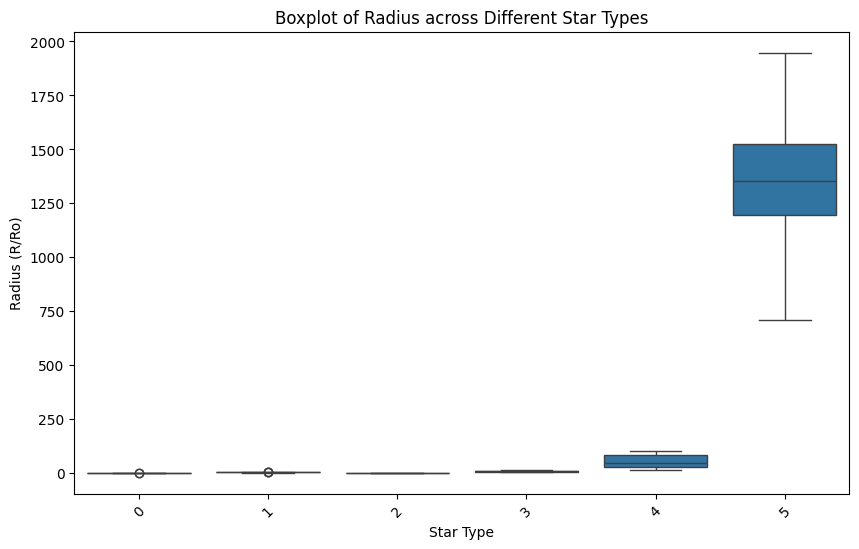

ANOVA F-statistic: 1113.9082
ANOVA p-value: 0.0000
There is a significant difference in Radius between different Star types.


In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/6 class csv.csv")

# Display unique star types for reference
print("Unique Star Types:", df['Star type'].unique())

# Boxplot to visualize the distribution of Radius across different Star types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Star type', y='Radius(R/Ro)', data=df)
plt.title('Boxplot of Radius across Different Star Types')
plt.xlabel('Star Type')
plt.ylabel('Radius (R/Ro)')
plt.xticks(rotation=45)
plt.show()

# Perform One-Way ANOVA
# Extracting Radius values for each Star type group
star_type_groups = [group['Radius(R/Ro)'].values for name, group in df.groupby('Star type')]

# ANOVA test
f_statistic, p_value = stats.f_oneway(*star_type_groups)

# Print the results
print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA p-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("There is a significant difference in Radius between different Star types.")
else:
    print("There is no significant difference in Radius between different Star types.")


Unique Star Types: [0 1 2 3 4 5]


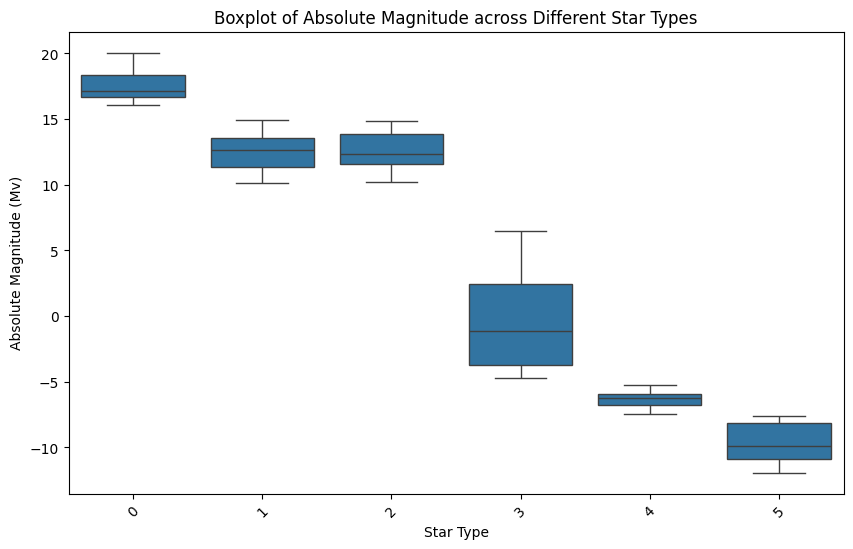

ANOVA F-statistic: 1496.5344
ANOVA p-value: 0.0000
There is a significant difference in Absolute Magnitude between different Star types.


In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/6 class csv.csv")

# Display unique star types for reference
print("Unique Star Types:", df['Star type'].unique())

# Boxplot to visualize the distribution of Absolute Magnitude across different Star types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Star type', y='Absolute magnitude(Mv)', data=df)
plt.title('Boxplot of Absolute Magnitude across Different Star Types')
plt.xlabel('Star Type')
plt.ylabel('Absolute Magnitude (Mv)')
plt.xticks(rotation=45)
plt.show()

# Perform One-Way ANOVA
# Extracting Absolute Magnitude values for each Star type group
star_type_groups = [group['Absolute magnitude(Mv)'].values for name, group in df.groupby('Star type')]

# ANOVA test
f_statistic, p_value = stats.f_oneway(*star_type_groups)

# Print the results
print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA p-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("There is a significant difference in Absolute Magnitude between different Star types.")
else:
    print("There is no significant difference in Absolute Magnitude between different Star types.")


Unique Star Types: [0 1 2 3 4 5]


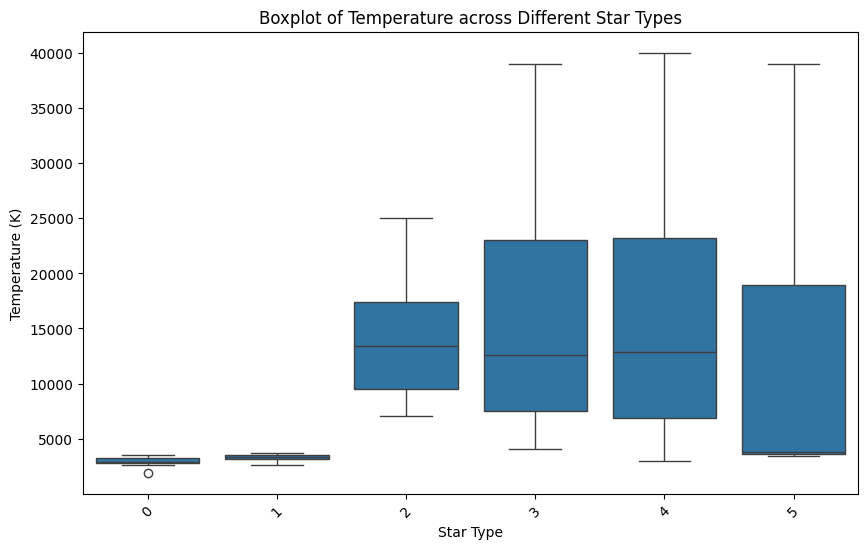

ANOVA F-statistic: 22.1037
ANOVA p-value: 0.0000
There is a significant difference in Temperature between different Star types.


In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/6 class csv.csv")

# Display unique star types for reference
print("Unique Star Types:", df['Star type'].unique())

# Boxplot to visualize the distribution of Temperature across different Star types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Star type', y='Temperature (K)', data=df)
plt.title('Boxplot of Temperature across Different Star Types')
plt.xlabel('Star Type')
plt.ylabel('Temperature (K)')
plt.xticks(rotation=45)
plt.show()

# Perform One-Way ANOVA
# Extracting Temperature values for each Star type group
star_type_groups = [group['Temperature (K)'].values for name, group in df.groupby('Star type')]

# ANOVA test
f_statistic, p_value = stats.f_oneway(*star_type_groups)

# Print the results
print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA p-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("There is a significant difference in Temperature between different Star types.")
else:
    print("There is no significant difference in Temperature between different Star types.")


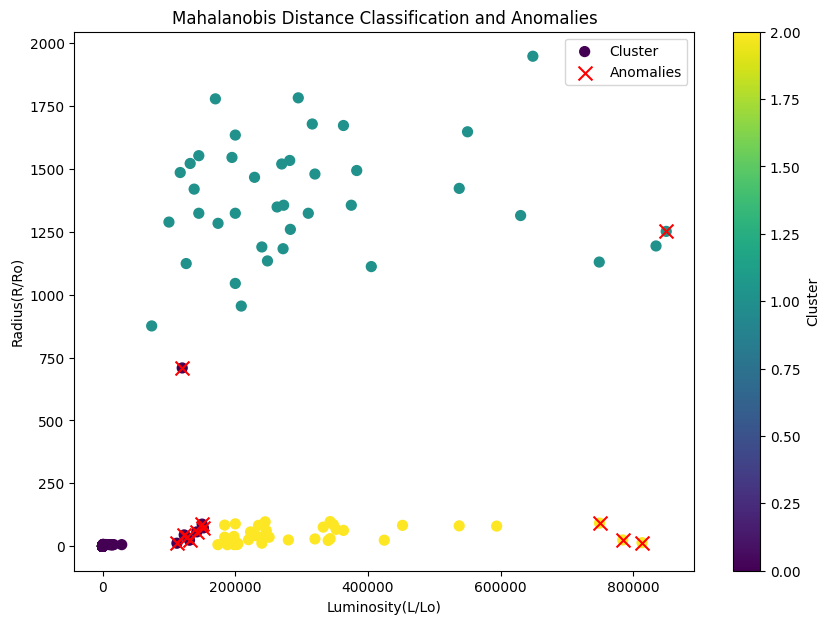

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal

# Load the dataset
df = pd.read_csv("6 class csv.csv")

# Extracting the features for clustering
X = df[['Luminosity(L/Lo)', 'Radius(R/Ro)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering to determine cluster centers
optimal_clusters = 3  # Replace with the number chosen from the elbow plot or domain knowledge
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Assign cluster labels to each data point
df['Cluster'] = kmeans.labels_

# Fit Gaussian distributions for each cluster
gaussians = []
covariances = []
for i in range(optimal_clusters):
    cluster_data = X_scaled[df['Cluster'] == i]
    mean = np.mean(cluster_data, axis=0)
    cov = np.cov(cluster_data.T, ddof=0)ddddddddddddddddddddq
    gaussians.append(multivariate_normal(mean, cov))
    covariances.append(cov)

# Mahalanobis distance function
def mahalanobis_distance(x, mean, cov):
    cov_inv = np.linalg.inv(cov)
    return mahalanobis(x, mean, cov_inv)

# Function to detect anomalies
def detect_anomalies(df, cluster_centers, covariances, threshold_factor=3):
    df['Mahalanobis_Distance'] = df.apply(lambda row: mahalanobis_distance(
        row[['Luminosity(L/Lo)', 'Radius(R/Ro)']].values,
        cluster_centers[row['Cluster']],
        covariances[row['Cluster']]
    ), axis=1)

    # Calculate a data-driven threshold
    distances = df['Mahalanobis_Distance']
    threshold = np.percentile(distances, 95)  # Use 95th percentile for threshold
    df['Anomaly'] = df['Mahalanobis_Distance'] > threshold

    return df, threshold

# Apply anomaly detection
df, threshold = detect_anomalies(df, cluster_centers, covariances)

# Plot clusters and anomalies
plt.figure(figsize=(10, 7))
# Plot the clusters
scatter = plt.scatter(df['Luminosity(L/Lo)'], df['Radius(R/Ro)'],
                      c=df['Cluster'], cmap='viridis', s=50, label='Cluster')

# Highlight anomalies
anomalies = df[df['Anomaly']]
plt.scatter(anomalies['Luminosity(L/Lo)'], anomalies['Radius(R/Ro)'],
            color='red', s=100, edgecolor='k', marker='x', label='Anomalies')

# Labels for the axes
plt.xlabel('Luminosity(L/Lo)')
plt.ylabel('Radius(R/Ro)')

# Title for the plot
plt.title('Mahalanobis Distance Classification and Anomalies')

# Show color bar
plt.colorbar(scatter, label='Cluster')

# Add legend
plt.legend()

# Show plot
plt.show()

# Function to predict the cluster for new user input and print details
def predict_user_input(luminosity, radius):
    # Standardize the user input
    user_input_scaled = scaler.transform([[luminosity, radius]])
    # Classify the user input
    cluster, distances = classify_point(user_input_scaled[0], cluster_centers, covariances)

    # Calculate Mahalanobis distance for user input
    user_distance = mahalanobis_distance(user_input_scaled[0], cluster_centers[cluster], covariances[cluster])
    is_anomaly = user_distance > threshold  # Using the calculated threshold

    # Print the details
    print(f"User Input: Luminosity = {luminosity}, Radius = {radius}")
    print(f"Predicted Cluster: {cluster}")
    print(f"Mahalanobis Distance to Predicted Cluster Center: {user_distance:.4f}")
    print(f"Anomaly Status: {'Yes' if is_anomaly else 'No'}")
    print(f"Covariance Matrix of the Predicted Cluster:")
    print(np.array2string(covariances[cluster], separator=', ', formatter={'float_kind': lambda x: f'{x:0.4f}'}))

    return cluster, is_anomaly




In [ ]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
df = pd.read_csv("/content/6 class csv.csv")

# Display unique Spectral Classes and Star Colors for reference
print("Unique Spectral Classes:", df['Star color'].unique())
print("Unique Star Colors:", df['Spectral Class'].unique())

# Create a contingency table of Spectral Class vs. Star color
contingency_table = pd.crosstab(df['Star color'], df['Spectral Class'])

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p:}")

# Conclusion
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant association between Spectral Class and Star color.")
else:
    print("There is no significant association between Spectral Class and Star color.")


Unique Spectral Classes: ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']
Unique Star Colors: ['M' 'B' 'A' 'F' 'O' 'K' 'G']

Contingency Table:
Spectral Class      A   B  F  G  K    M   O
Star color                                 
Blue                0  15  0  0  0    0  40
Blue                0   1  0  0  0    0   0
Blue White          1   9  0  0  0    0   0
Blue white          2   1  0  0  0    0   0
Blue white          0   1  0  0  0    0   0
Blue-White          1   0  0  0  0    0   0
Blue-white          8  18  0  0  0    0   0
Orange              0   0  0  0  1    1   0
Orange-Red          0   0  0  0  1    0   0
Pale yellow orange  0   0  1  0  0    0   0
Red                 0   0  0  1  1  110   0
White               5   0  2  0  0    0   0
White-Yellow        0   0  1  0  0    0   0
Whitish     

In [ ]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
df = pd.read_csv("/content/6 class csv.csv")

# Display unique Spectral Classes and Star Colors for reference
print("Unique Spectral Classes:", df['Spectral Class'].unique())
print("Unique Star Types:", df['Star type'].unique())

# Create a contingency table of Spectral Class vs. Star color
contingency_table = pd.crosstab(df['Spectral Class'], df['Star type'])

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p:}")

# Conclusion
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant association between Spectral Class and Star Types.")
else:
    print("There is no significant association between Spectral Class and Star Types.")


Unique Spectral Classes: ['M' 'B' 'A' 'F' 'O' 'K' 'G']
Unique Star Types: [0 1 2 3 4 5]

Contingency Table:
Star type        0   1   2   3   4   5
Spectral Class                        
A                0   0   7  10   0   2
B                0   0  24  13   2   7
F                0   0   9   8   0   0
G                0   0   0   0   0   1
K                0   0   0   4   0   2
M               40  40   0   0   9  22
O                0   0   0   5  29   6

Chi-Square Statistic: 328.3927
Degrees of Freedom: 30
p-value: 6.361278506929861e-52
There is a significant association between Spectral Class and Star Types.


In [ ]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
df = pd.read_csv("/content/6 class csv.csv")

# Display unique Spectral Classes and Star Colors for reference
print("Unique Spectral Classes:", df['Star color'].unique())
print("Unique Star Types:", df['Star type'].unique())

# Create a contingency table of Spectral Class vs. Star color
contingency_table = pd.crosstab(df['Star color'], df['Star type'])

# Display the contingency table
print("\nContingency Table:")
print(contingency_table)

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p:}")

# Conclusion
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant association between Star Colors and Star Types.")
else:
    print("There is no significant association between Star Colors and Star Types.")

Unique Spectral Classes: ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']
Unique Star Types: [0 1 2 3 4 5]

Contingency Table:
Star type            0   1   2   3   4   5
Star color                                
Blue                 0   0  12   5  31   7
Blue                 0   0   1   0   0   0
Blue White           0   0  10   0   0   0
Blue white           0   0   3   0   0   0
Blue white           0   0   1   0   0   0
Blue-White           0   0   0   1   0   0
Blue-white           0   0   0  20   0   6
Orange               0   0   0   0   0   2
Orange-Red           0   0   0   1   0   0
Pale yellow orange   0   0   1   0   0   0
Red                 40  40   0   0   9  23
White                0   0   5   0   0   2
White-Yellow         0   0   1   0   0   0
Whitish              0   0   0   2   0   0
Y

Normality Check Results:

Luminosity(L/Lo):
  Group 0: Shapiro-Wilk Stat = 0.4756, p-value = 8.869922731252006e-11
  Group 1: Shapiro-Wilk Stat = 0.6368, p-value = 1.0320299272463723e-08
  Group 2: Shapiro-Wilk Stat = 0.2328, p-value = 3.4760781804049847e-13
  Group 3: Shapiro-Wilk Stat = 0.4915, p-value = 1.353438343366915e-10
  Group 4: Shapiro-Wilk Stat = 0.8098, p-value = 1.0903562299845226e-05
  Group 5: Shapiro-Wilk Stat = 0.8425, p-value = 5.9591268078224576e-05

Radius(R/Ro):
  Group 0: Shapiro-Wilk Stat = 0.9204, p-value = 0.007903941900697415
  Group 1: Shapiro-Wilk Stat = 0.9467, p-value = 0.058204597902522026
  Group 2: Shapiro-Wilk Stat = 0.9290, p-value = 0.014922593509787632
  Group 3: Shapiro-Wilk Stat = 0.8642, p-value = 0.0002030616013499613
  Group 4: Shapiro-Wilk Stat = 0.9125, p-value = 0.0045075854942201775
  Group 5: Shapiro-Wilk Stat = 0.9915, p-value = 0.9890369296175816

Temperature (K):
  Group 0: Shapiro-Wilk Stat = 0.9328, p-value = 0.019854644915791433
  G

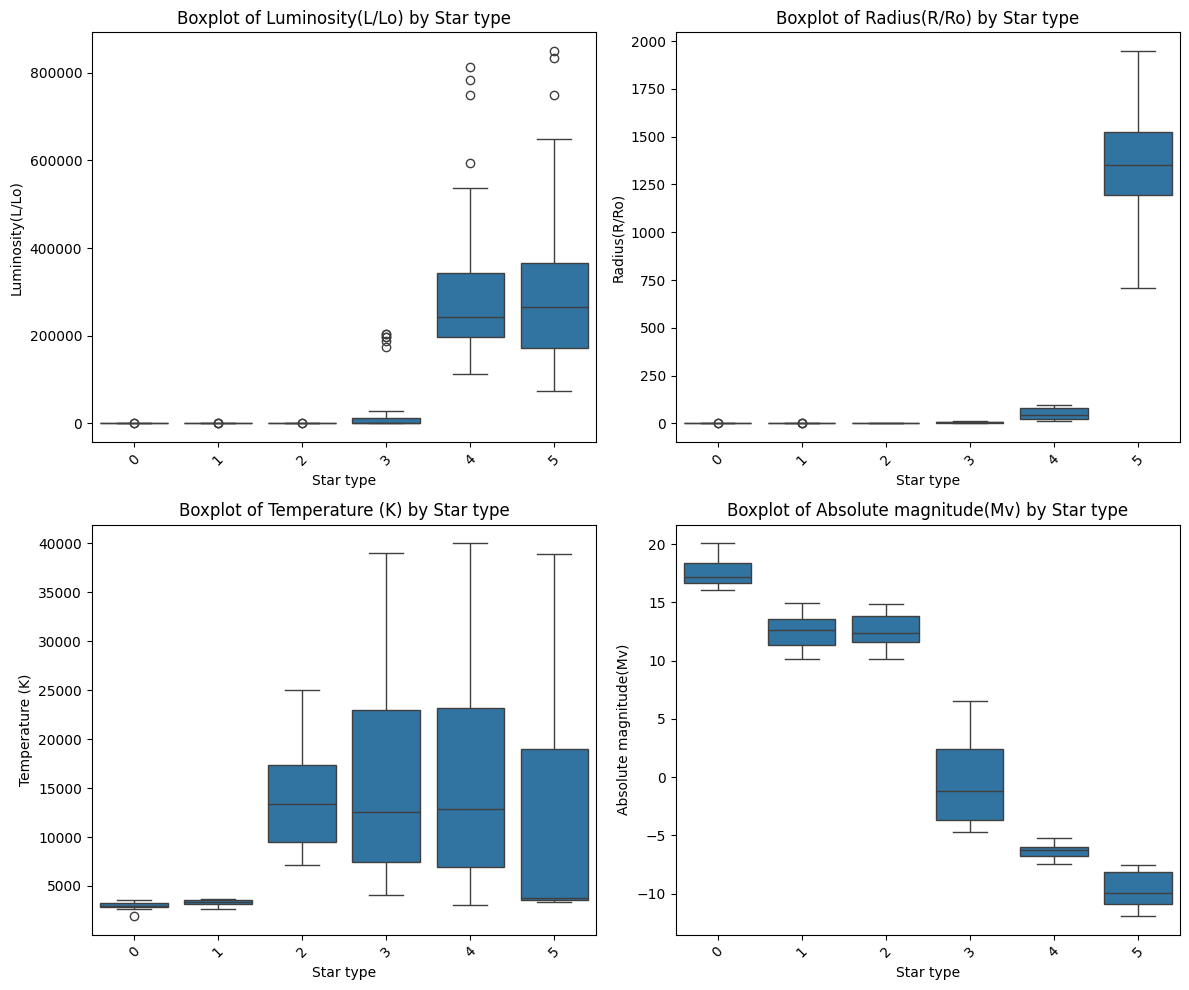


Conclusive Statement:

For Luminosity(L/Lo):
The ANOVA p-value is 6.643273871281763e-47, which is less than the significance level of 0.05.
There is a significant difference in the means of Luminosity(L/Lo) among different Star types.

For Radius(R/Ro):
The ANOVA p-value is 6.384847537214598e-161, which is less than the significance level of 0.05.
There is a significant difference in the means of Radius(R/Ro) among different Star types.

For Temperature (K):
The ANOVA p-value is 3.989632637115045e-18, which is less than the significance level of 0.05.
There is a significant difference in the means of Temperature (K) among different Star types.

For Absolute magnitude(Mv):
The ANOVA p-value is 2.1608088460391526e-175, which is less than the significance level of 0.05.
There is a significant difference in the means of Absolute magnitude(Mv) among different Star types.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, shapiro, levene
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("6 class csv.csv")

# Check normality for each group using Shapiro-Wilk test
def check_normality(df, column, group_column):
    normality_results = {}
    for group in df[group_column].unique():
        group_data = df[df[group_column] == group][column]
        stat, p = shapiro(group_data)
        normality_results[group] = (stat, p)
    return normality_results

# Check homogeneity of variances using Levene’s test
def check_variance_homogeneity(df, column, group_column):
    groups = [df[df[group_column] == group][column] for group in df[group_column].unique()]
    stat, p = levene(*groups)
    return stat, p

# Apply ANOVA
def perform_anova(df, column, group_column):
    groups = [df[df[group_column] == group][column] for group in df[group_column].unique()]
    stat, p = f_oneway(*groups)
    return stat, p

# Check normality for each column
columns = ['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Temperature (K)', 'Absolute magnitude(Mv)']
group_column = 'Star type'

normality_results = {col: check_normality(df, col, group_column) for col in columns}
variance_homogeneity_results = {col: check_variance_homogeneity(df, col, group_column) for col in columns}
anova_results = {col: perform_anova(df, col, group_column) for col in columns}

# Print results
print("Normality Check Results:")
for col, results in normality_results.items():
    print(f"\n{col}:")
    for group, (stat, p) in results.items():
        print(f"  Group {group}: Shapiro-Wilk Stat = {stat:.4f}, p-value = {p}")

print("\nVariance Homogeneity Check Results:")
for col, (stat, p) in variance_homogeneity_results.items():
    print(f"{col}: Levene’s Test Stat = {stat:.4f}, p-value = {p}")

print("\nANOVA Results:")
for col, (stat, p) in anova_results.items():
    print(f"{col}: ANOVA Stat = {stat:.4f}, p-value = {p}")

# Plot boxplots to visualize distributions
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[group_column], y=df[col])
    plt.title(f'Boxplot of {col} by {group_column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusive statement
alpha = 0.05  # Significance level

print("\nConclusive Statement:")
for col in columns:
    anova_stat, anova_p = anova_results[col]
    print(f"\nFor {col}:")

    # Check if p-values from ANOVA are significant
    if anova_p < alpha:
        print(f"The ANOVA p-value is {anova_p}, which is less than the significance level of {alpha}.")
        print(f"There is a significant difference in the means of {col} among different Star types.")
    else:
        print(f"The ANOVA p-value is {anova_p}, which is greater than the significance level of {alpha}.")
        print(f"There is no significant difference in the means of {col} among different Star types.")


Normality Check Results:

Luminosity(L/Lo):
  Group 0: Shapiro-Wilk Stat = 0.4756, p-value = 8.869922731252006e-11
  Normality assumption not satisfied for Group 0.
  Group 1: Shapiro-Wilk Stat = 0.6368, p-value = 1.0320299272463723e-08
  Normality assumption not satisfied for Group 1.
  Group 2: Shapiro-Wilk Stat = 0.2328, p-value = 3.4760781804049847e-13
  Normality assumption not satisfied for Group 2.
  Group 3: Shapiro-Wilk Stat = 0.4915, p-value = 1.353438343366915e-10
  Normality assumption not satisfied for Group 3.
  Group 4: Shapiro-Wilk Stat = 0.8098, p-value = 1.0903562299845226e-05
  Normality assumption not satisfied for Group 4.
  Group 5: Shapiro-Wilk Stat = 0.8425, p-value = 5.9591268078224576e-05
  Normality assumption not satisfied for Group 5.
Variance Homogeneity: Levene’s Test Stat = 20.1219, p-value = 1.1035584659862627e-16
Variance homogeneity assumption not satisfied.
ANOVA not performed due to unsatisfied conditions.

Radius(R/Ro):
  Group 0: Shapiro-Wilk Stat

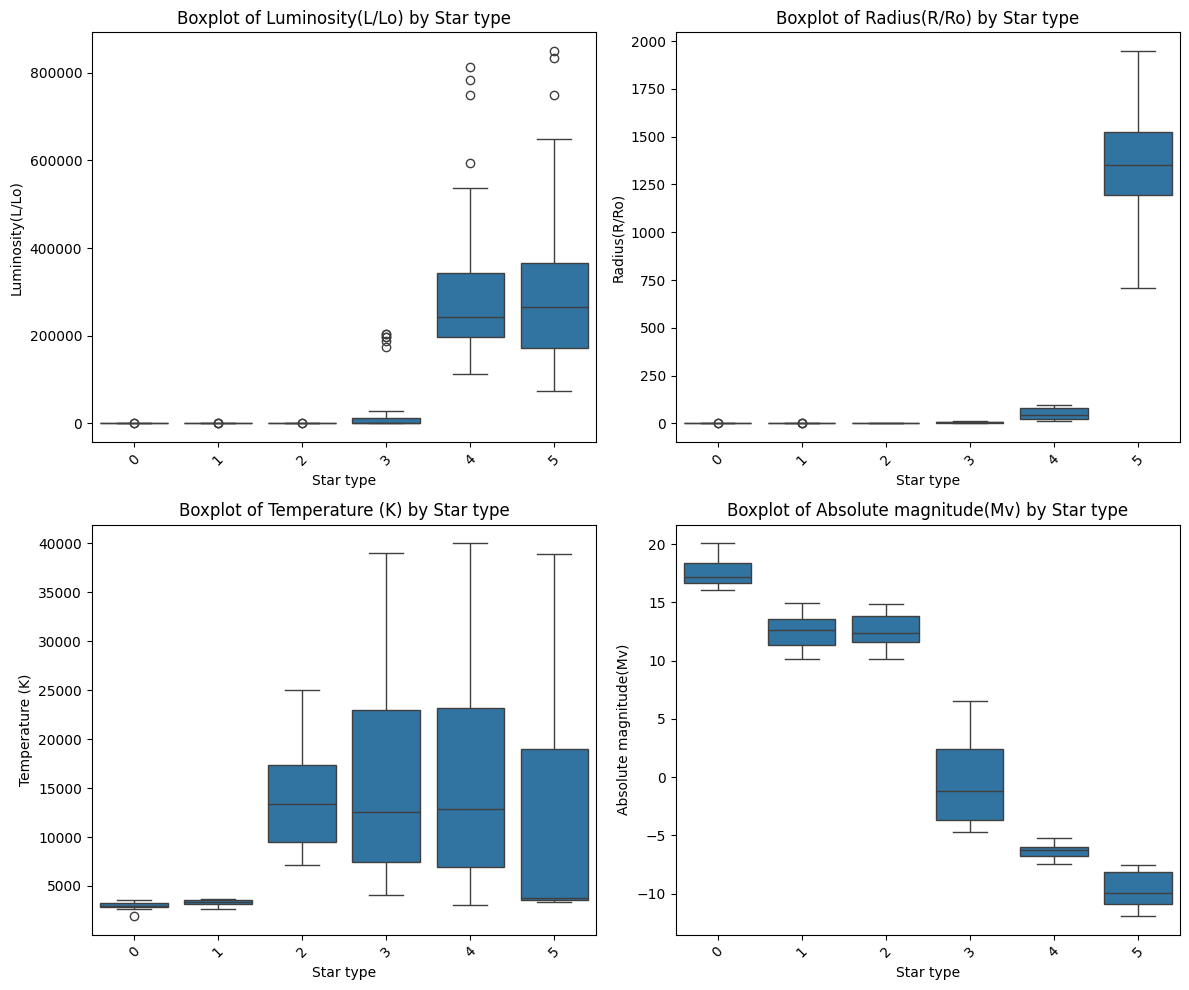

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, shapiro, levene
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("6 class csv.csv")

# Check normality for each group using Shapiro-Wilk test
def check_normality(df, column, group_column):
    normality_results = {}
    for group in df[group_column].unique():
        group_data = df[df[group_column] == group][column]
        stat, p = shapiro(group_data)
        normality_results[group] = (stat, p)
    return normality_results

# Check homogeneity of variances using Levene’s test
def check_variance_homogeneity(df, column, group_column):
    groups = [df[df[group_column] == group][column] for group in df[group_column].unique()]
    stat, p = levene(*groups)
    return stat, p

# Apply ANOVA
def perform_anova(df, column, group_column):
    groups = [df[df[group_column] == group][column] for group in df[group_column].unique()]
    stat, p = f_oneway(*groups)
    return stat, p

# Check normality and variance homogeneity for each column
columns = ['Luminosity(L/Lo)', 'Radius(R/Ro)', 'Temperature (K)', 'Absolute magnitude(Mv)']
group_column = 'Star type'

normality_results = {col: check_normality(df, col, group_column) for col in columns}
variance_homogeneity_results = {col: check_variance_homogeneity(df, col, group_column) for col in columns}

# Perform ANOVA only if conditions are satisfied
alpha = 0.05  # Significance level
anova_results = {}

print("Normality Check Results:")
for col, results in normality_results.items():
    print(f"\n{col}:")
    normality_satisfied = True
    for group, (stat, p) in results.items():
        print(f"  Group {group}: Shapiro-Wilk Stat = {stat:.4f}, p-value = {p}")
        if p < alpha:
            print(f"  Normality assumption not satisfied for Group {group}.")
            normality_satisfied = False

    # Check homogeneity of variances
    var_stat, var_p = variance_homogeneity_results[col]
    print(f"Variance Homogeneity: Levene’s Test Stat = {var_stat:.4f}, p-value = {var_p}")
    if var_p < alpha:
        print("Variance homogeneity assumption not satisfied.")
        variance_satisfied = False
    else:
        variance_satisfied = True

    # Perform ANOVA if both assumptions are satisfied
    if normality_satisfied and variance_satisfied:
        anova_stat, anova_p = perform_anova(df, col, group_column)
        anova_results[col] = (anova_stat, anova_p)
        print(f"ANOVA Stat = {anova_stat:.4f}, p-value = {anova_p}")
    else:
        anova_results[col] = (None, None)
        print("ANOVA not performed due to unsatisfied conditions.")

# Print ANOVA results
print("\nANOVA Results:")
for col, (stat, p) in anova_results.items():
    if stat is not None:
        if p < alpha:
            print(f"{col}: ANOVA p-value = {p} (Significant difference among groups)")
        else:
            print(f"{col}: ANOVA p-value = {p} (No significant difference among groups)")
    else:
        print(f"{col}: ANOVA was not performed.")

# Plot boxplots to visualize distributions
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[group_column], y=df[col])
    plt.title(f'Boxplot of {col} by {group_column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Principal Component 1 explains 60.36% of the variance
Principal Component 2 explains 23.50% of the variance
Principal Component 3 explains 9.33% of the variance
Principal Component 4 explains 6.81% of the variance


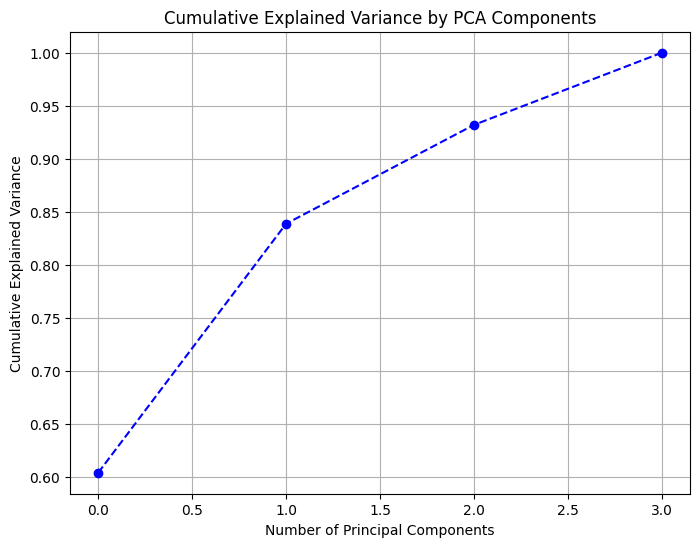

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)
PC1        -0.350183         -0.559338     -0.474771                0.582327
PC2         0.821613          0.004526     -0.568981                0.034535
PC3        -0.376078          0.755096     -0.533141                0.064461
PC4         0.246758          0.341980      0.408183                0.809659
Top 3 features for PC1: ['Radius(R/Ro)' 'Luminosity(L/Lo)' 'Absolute magnitude(Mv)']
Top 3 features for PC2: ['Absolute magnitude(Mv)' 'Radius(R/Ro)' 'Temperature (K)']
Top 3 features for PC3: ['Temperature (K)' 'Radius(R/Ro)' 'Luminosity(L/Lo)']
Top 3 features for PC4: ['Luminosity(L/Lo)' 'Radius(R/Ro)' 'Absolute magnitude(Mv)']


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace 'your_dataset.csv' with your file)
# The dataset should have the specified numeric columns
df = pd.read_csv('6 class csv.csv')

# Selecting only the numeric columns you specified
numeric_columns = ['Temperature (K)', 'Luminosity(L/Lo)',
                   'Radius(R/Ro)', 'Absolute magnitude(Mv)']

# Separating out the features (numeric columns)
X = df[numeric_columns].values

# Standardizing the features (mean = 0 and variance = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=None)  # Set None to keep all components, or specify a number like n_components=2
principal_components = pca.fit_transform(X_scaled)

# Explained variance ratio to understand the importance of each component
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame for principal components (optional)
pc_df = pd.DataFrame(data=principal_components,
                     columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Print explained variance for each principal component
for i, variance in enumerate(explained_variance):
    print(f'Principal Component {i+1} explains {variance*100:.2f}% of the variance')

# Plot the explained variance to find important features (Scree Plot)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Identify most important features in each principal component
# Components are linear combinations of the original features
# The higher the absolute value of the coefficient, the more important the feature
pca_components = pd.DataFrame(pca.components_, columns=numeric_columns, index=[f'PC{i+1}' for i in range(len(pca.components_))])

# Display the components to see the contribution of each feature in every principal component
print(pca_components)

# You can extract the most important features for each principal component
n_important_features = 3  # Number of top features to display for each component
for i in range(len(pca.components_)):
    component = pca.components_[i]
    important_features = np.argsort(np.abs(component))[-n_important_features:]  # Sort by absolute values
    print(f'Top {n_important_features} features for PC{i+1}: {np.array(numeric_columns)[important_features]}')

Variance of temperatures with 2 prime factors: 75539282.76
Variance of temperatures with 3 prime factors: 72067276.35
Variance of temperatures with 4 prime factors: 113941968.84
Sample Standard Deviation for group with 2 prime factors: 8723.57
Sample Standard Deviation for group with 3 prime factors: 8789.33
Sample Standard Deviation for group with 4 prime factors: 10112.59
ANOVA F-statistic (samples): 11.99
ANOVA p-value (samples): 9.812897960783808e-06
There is a significant difference in temperature between the groups with 2, 3, and 4 prime factors.


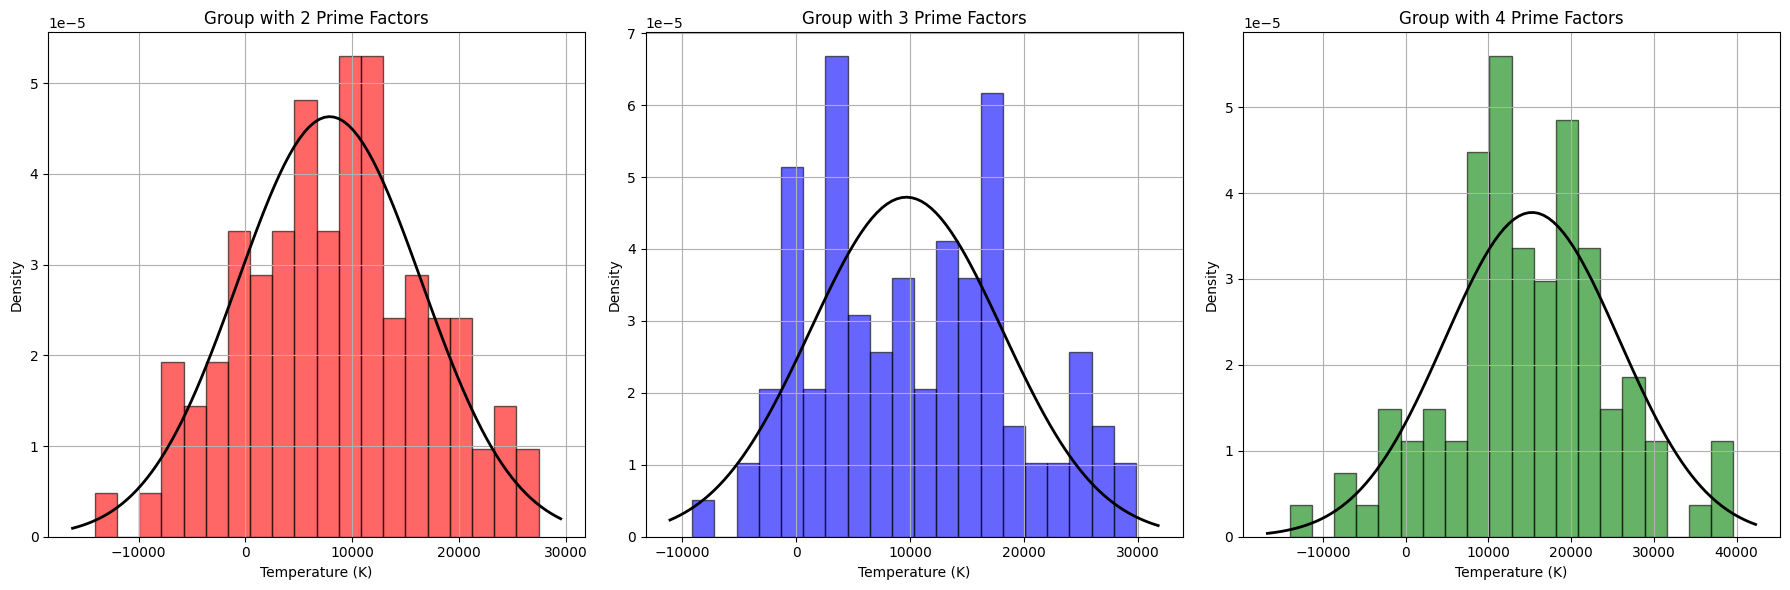

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import primefactors
from scipy.stats import norm, f_oneway

# Load dataset (replace 'ASTRO.csv' with your actual file path)
df = pd.read_csv('6 class csv.csv')

# Rounding columns to the nearest integers
df_rounded = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].round().astype(int)

# Function to calculate distinct prime factors
def distinct_prime_factors(n):
    if n > 1:
        return len(primefactors(n))
    else:
        return 0

# Applying prime factorization to the entire DataFrame
df_prime_factors = df_rounded.applymap(distinct_prime_factors)

# Adding the prime factor groups to the original DataFrame
df['Prime Factors'] = df_prime_factors['Temperature (K)']

# Separating temperatures based on the number of prime factors
temp_group_2 = df[df['Prime Factors'] == 2]['Temperature (K)']
temp_group_3 = df[df['Prime Factors'] == 3]['Temperature (K)']
temp_group_4 = df[df['Prime Factors'] == 4]['Temperature (K)']

# Calculate variances
var_2 = np.var(temp_group_2, ddof=1)
var_3 = np.var(temp_group_3, ddof=1)
var_4 = np.var(temp_group_4, ddof=1)

print(f"Variance of temperatures with 2 prime factors: {var_2:.2f}")
print(f"Variance of temperatures with 3 prime factors: {var_3:.2f}")
print(f"Variance of temperatures with 4 prime factors: {var_4:.2f}")

# Fit normal distributions to the data and generate random samples
mean_2, std_dev_2 = norm.fit(temp_group_2)
mean_3, std_dev_3 = norm.fit(temp_group_3)
mean_4, std_dev_4 = norm.fit(temp_group_4)

np.random.seed(0)
sample_size = 100  # Adjust as needed

# Draw random samples from normal distributions
sample_2 = np.random.normal(loc=mean_2, scale=std_dev_2, size=sample_size)
sample_3 = np.random.normal(loc=mean_3, scale=std_dev_3, size=sample_size)
sample_4 = np.random.normal(loc=mean_4, scale=std_dev_4, size=sample_size)

# Calculate sample standard deviations
std_dev_sample_2 = np.std(sample_2, ddof=1)
std_dev_sample_3 = np.std(sample_3, ddof=1)
std_dev_sample_4 = np.std(sample_4, ddof=1)

print(f"Sample Standard Deviation for group with 2 prime factors: {std_dev_sample_2:.2f}")
print(f"Sample Standard Deviation for group with 3 prime factors: {std_dev_sample_3:.2f}")
print(f"Sample Standard Deviation for group with 4 prime factors: {std_dev_sample_4:.2f}")

# Perform One-Way ANOVA on the random samples
f_statistic_sample, p_value_sample = f_oneway(sample_2, sample_3, sample_4)

print(f"ANOVA F-statistic (samples): {f_statistic_sample:.2f}")
print(f"ANOVA p-value (samples): {p_value_sample:}")

# Check significance (assuming alpha = 0.05)
alpha = 0.05
if p_value_sample < alpha:
    print("There is a significant difference in temperature between the groups with 2, 3, and 4 prime factors.")
else:
    print("There is no significant difference in temperature between the groups with 2, 3, and 4 prime factors.")

# Display histograms and normal distributions of random samples
plt.figure(figsize=(18, 6))

# Plot for Group with 2 Prime Factors
plt.subplot(1, 3, 1)
plt.hist(sample_2, bins=20, density=True, alpha=0.6, color='red', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_2, std_dev_2)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Group with 2 Prime Factors')
plt.xlabel('Temperature (K)')
plt.ylabel('Density')
plt.grid(True)

# Plot for Group with 3 Prime Factors
plt.subplot(1, 3, 2)
plt.hist(sample_3, bins=20, density=True, alpha=0.6, color='blue', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_3, std_dev_3)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Group with 3 Prime Factors')
plt.xlabel('Temperature (K)')
plt.ylabel('Density')
plt.grid(True)

# Plot for Group with 4 Prime Factors
plt.subplot(1, 3, 3)
plt.hist(sample_4, bins=20, density=True, alpha=0.6, color='green', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_4, std_dev_4)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Group with 4 Prime Factors')
plt.xlabel('Temperature (K)')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()

Variance of temperatures with 2 prime factors: 75539282.76
Variance of temperatures with 3 prime factors: 72067276.35
Variance of temperatures with 4 prime factors: 113941968.84
Variance of temperatures with 5 prime factors: 362576100.00
Sample Standard Deviation for group with 2 prime factors: 8723.57
Sample Standard Deviation for group with 3 prime factors: 8789.33
Sample Standard Deviation for group with 4 prime factors: 10112.59
Sample Standard Deviation for group with 5 prime factors: 14521.72
ANOVA F-statistic (samples): 7.76
ANOVA p-value (samples): 0.0000
There is a significant difference in temperature between the groups with 2, 3, 4, and 5 prime factors.


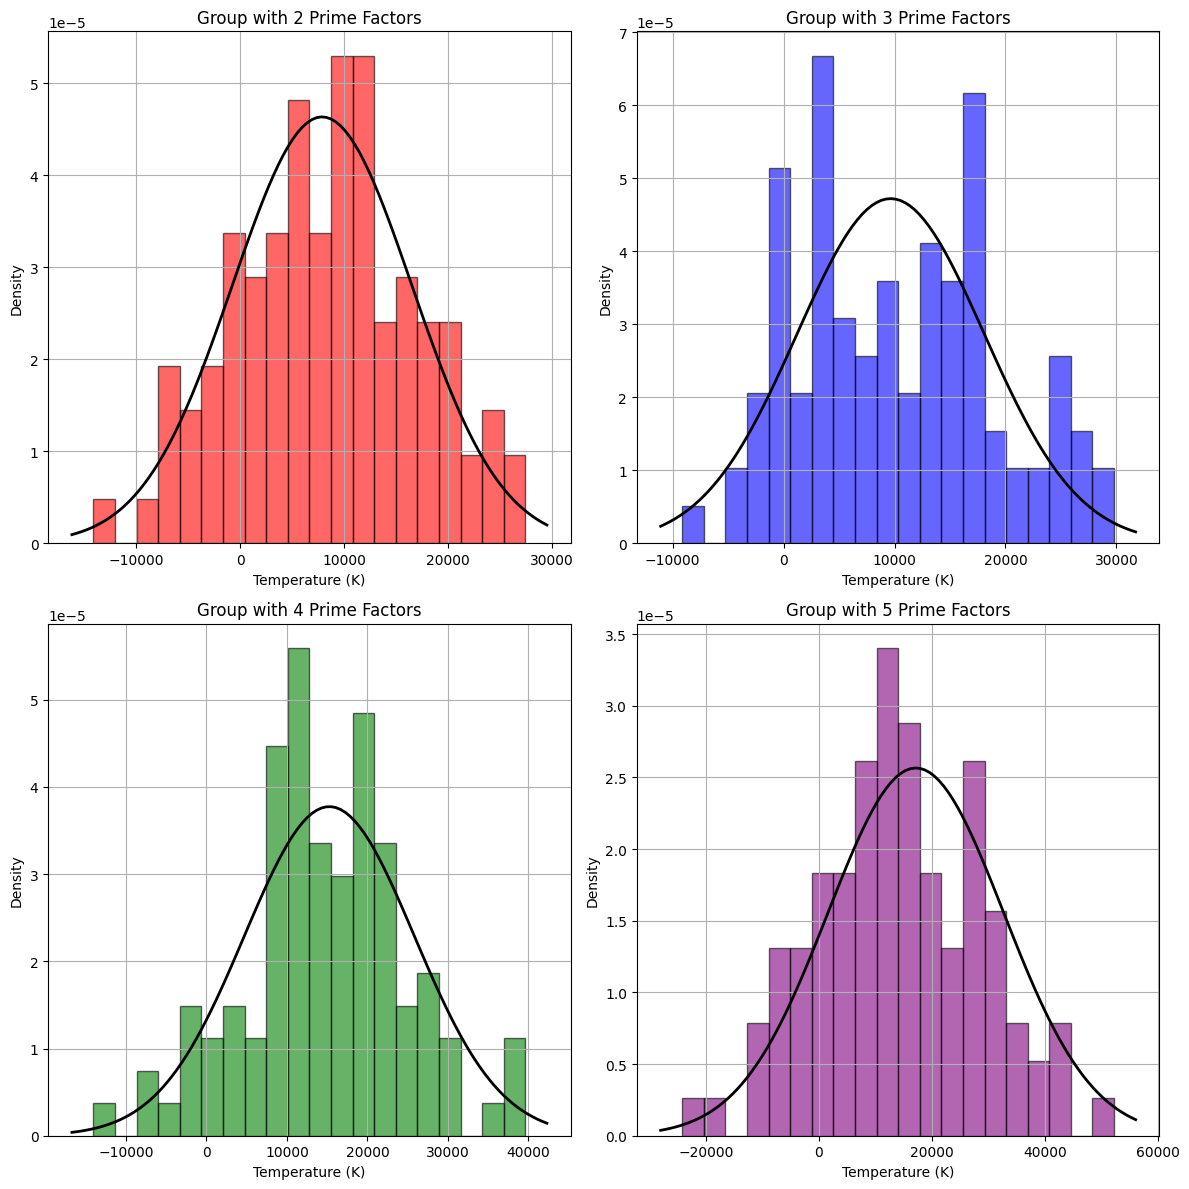

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import primefactors
from scipy.stats import norm, f_oneway

# Load dataset (replace '6 class csv.csv' with your actual file path)
df = pd.read_csv('6 class csv.csv')

# Rounding columns to the nearest integers
df_rounded = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']].round().astype(int)

# Function to calculate distinct prime factors
def distinct_prime_factors(n):
    if n > 1:
        return len(primefactors(n))
    else:
        return 0

# Applying prime factorization to the entire DataFrame
df_prime_factors = df_rounded.applymap(distinct_prime_factors)

# Adding the prime factor groups to the original DataFrame
df['Prime Factors'] = df_prime_factors['Temperature (K)']

# Separating temperatures based on the number of prime factors (2 to 5)
temp_group_2 = df[df['Prime Factors'] == 2]['Temperature (K)']
temp_group_3 = df[df['Prime Factors'] == 3]['Temperature (K)']
temp_group_4 = df[df['Prime Factors'] == 4]['Temperature (K)']
temp_group_5 = df[df['Prime Factors'] == 5]['Temperature (K)']

# Calculate variances
var_2 = np.var(temp_group_2, ddof=1)
var_3 = np.var(temp_group_3, ddof=1)
var_4 = np.var(temp_group_4, ddof=1)
var_5 = np.var(temp_group_5, ddof=1)

print(f"Variance of temperatures with 2 prime factors: {var_2:.2f}")
print(f"Variance of temperatures with 3 prime factors: {var_3:.2f}")
print(f"Variance of temperatures with 4 prime factors: {var_4:.2f}")
print(f"Variance of temperatures with 5 prime factors: {var_5:.2f}")

# Fit normal distributions to the data and generate random samples
mean_2, std_dev_2 = norm.fit(temp_group_2)
mean_3, std_dev_3 = norm.fit(temp_group_3)
mean_4, std_dev_4 = norm.fit(temp_group_4)
mean_5, std_dev_5 = norm.fit(temp_group_5)

np.random.seed(0)
sample_size = 100  # Adjust as needed

# Draw random samples from normal distributions
sample_2 = np.random.normal(loc=mean_2, scale=std_dev_2, size=sample_size)
sample_3 = np.random.normal(loc=mean_3, scale=std_dev_3, size=sample_size)
sample_4 = np.random.normal(loc=mean_4, scale=std_dev_4, size=sample_size)
sample_5 = np.random.normal(loc=mean_5, scale=std_dev_5, size=sample_size)

# Calculate sample standard deviations
std_dev_sample_2 = np.std(sample_2, ddof=1)
std_dev_sample_3 = np.std(sample_3, ddof=1)
std_dev_sample_4 = np.std(sample_4, ddof=1)
std_dev_sample_5 = np.std(sample_5, ddof=1)

print(f"Sample Standard Deviation for group with 2 prime factors: {std_dev_sample_2:.2f}")
print(f"Sample Standard Deviation for group with 3 prime factors: {std_dev_sample_3:.2f}")
print(f"Sample Standard Deviation for group with 4 prime factors: {std_dev_sample_4:.2f}")
print(f"Sample Standard Deviation for group with 5 prime factors: {std_dev_sample_5:.2f}")

# Perform One-Way ANOVA on the random samples
f_statistic_sample, p_value_sample = f_oneway(sample_2, sample_3, sample_4, sample_5)

print(f"ANOVA F-statistic (samples): {f_statistic_sample:.2f}")
print(f"ANOVA p-value (samples): {p_value_sample:.4f}")

# Check significance (assuming alpha = 0.05)
alpha = 0.05
if p_value_sample < alpha:
    print("There is a significant difference in temperature between the groups with 2, 3, 4, and 5 prime factors.")
else:
    print("There is no significant difference in temperature between the groups with 2, 3, 4, and 5 prime factors.")

# Display histograms and normal distributions of random samples
plt.figure(figsize=(12, 12))

# Plot for Group with 2 Prime Factors
plt.subplot(2, 2, 1)
plt.hist(sample_2, bins=20, density=True, alpha=0.6, color='red', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_2, std_dev_2)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Group with 2 Prime Factors')
plt.xlabel('Temperature (K)')
plt.ylabel('Density')
plt.grid(True)

# Plot for Group with 3 Prime Factors
plt.subplot(2, 2, 2)
plt.hist(sample_3, bins=20, density=True, alpha=0.6, color='blue', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_3, std_dev_3)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Group with 3 Prime Factors')
plt.xlabel('Temperature (K)')
plt.ylabel('Density')
plt.grid(True)

# Plot for Group with 4 Prime Factors
plt.subplot(2, 2, 3)
plt.hist(sample_4, bins=20, density=True, alpha=0.6, color='green', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_4, std_dev_4)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Group with 4 Prime Factors')
plt.xlabel('Temperature (K)')
plt.ylabel('Density')
plt.grid(True)

# Plot for Group with 5 Prime Factors
plt.subplot(2, 2, 4)
plt.hist(sample_5, bins=20, density=True, alpha=0.6, color='purple', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_5, std_dev_5)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Group with 5 Prime Factors')
plt.xlabel('Temperature (K)')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()



Cluster 0 Mahalanobis Distances:
count    162.000000
mean       0.520747
std        1.318924
min        0.018267
25%        0.251782
50%        0.251938
75%        0.252035
max       12.640814
Name: Mahalanobis_Distance, dtype: float64
Covariance Matrix for Cluster 0:
[[0.0259, 0.0083],
 [0.0083, 0.0119]]

Cluster 1 Mahalanobis Distances:
count    39.000000
mean      1.220802
std       0.723225
min       0.235918
25%       0.658324
50%       1.127902
75%       1.575888
max       2.893807
Name: Mahalanobis_Distance, dtype: float64
Covariance Matrix for Cluster 1:
[[1.2100, 0.0267],
 [0.0267, 0.2025]]

Cluster 2 Mahalanobis Distances:
count    39.000000
mean      1.229617
std       0.707732
min       0.446521
25%       0.720947
50%       1.091578
75%       1.450961
max       3.479032
Name: Mahalanobis_Distance, dtype: float64
Covariance Matrix for Cluster 2:
[[0.8549, 0.0121],
 [0.0121, 0.0034]]

Number of anomalies detected: 12


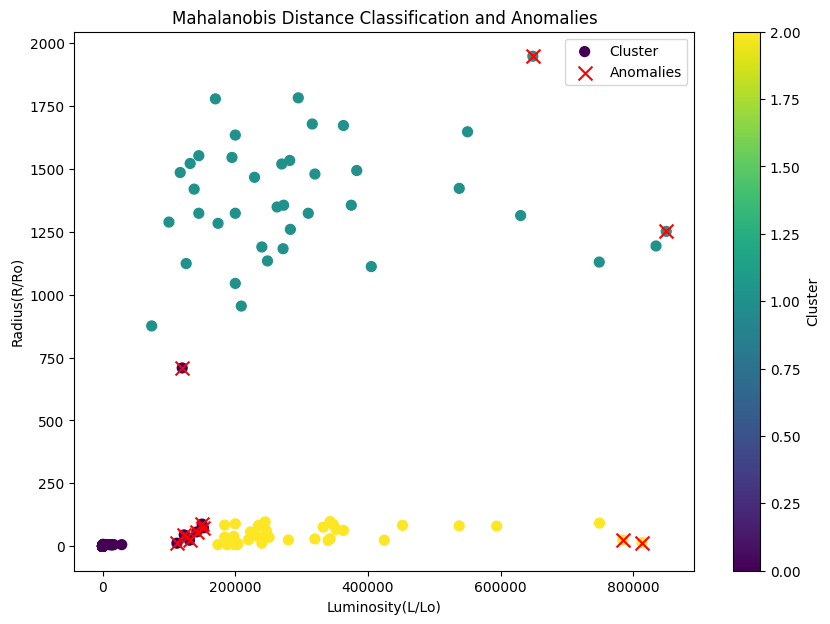

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import multivariate_normal

# Load the dataset
df = pd.read_csv("6 class csv.csv")

# Extracting the features for clustering
X = df[['Luminosity(L/Lo)', 'Radius(R/Ro)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering to determine cluster centers
optimal_clusters = 3  # Replace with the number chosen from the elbow plot or domain knowledge
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Assign cluster labels to each data point
df['Cluster'] = kmeans.labels_

# Fit Gaussian distributions for each cluster
gaussians = []
covariances = []
for i in range(optimal_clusters):
    cluster_data = X_scaled[df['Cluster'] == i]
    mean = np.mean(cluster_data, axis=0)
    cov = np.cov(cluster_data, rowvar=False, ddof=0)
    gaussians.append(multivariate_normal(mean, cov))
    covariances.append(cov)

# Mahalanobis distance function
def mahalanobis_distance(x, mean, cov):
    cov_inv = np.linalg.inv(cov)
    return mahalanobis(x, mean, cov_inv)

# Function to detect anomalies
def detect_anomalies(df, cluster_centers, covariances, threshold_factor=3):
    # Calculate Mahalanobis distances using scaled features
    scaled_features = scaler.transform(df[['Luminosity(L/Lo)', 'Radius(R/Ro)']])
    df['Mahalanobis_Distance'] = [
        mahalanobis_distance(scaled_features[i], cluster_centers[row['Cluster']], covariances[row['Cluster']])
        for i, row in df.iterrows()
    ]

    # Print Mahalanobis distances and covariance matrices
    for i in range(optimal_clusters):
        print(f"\nCluster {i} Mahalanobis Distances:")
        print(df[df['Cluster'] == i]['Mahalanobis_Distance'].describe())
        print(f"Covariance Matrix for Cluster {i}:")
        print(np.array2string(covariances[i], separator=', ', formatter={'float_kind': lambda x: f'{x:0.4f}'}))

    # Calculate a data-driven threshold
    distances = df['Mahalanobis_Distance']
    threshold = np.percentile(distances, 95)  # Use 95th percentile for threshold
    df['Anomaly'] = df['Mahalanobis_Distance'] > threshold

    # Print number of anomalies detected
    num_anomalies = df['Anomaly'].sum()
    print(f"\nNumber of anomalies detected: {num_anomalies}")

    return df, threshold

# Apply anomaly detection
df, threshold = detect_anomalies(df, cluster_centers, covariances)

# Plot clusters and anomalies
plt.figure(figsize=(10, 7))
# Plot the clusters
scatter = plt.scatter(df['Luminosity(L/Lo)'], df['Radius(R/Ro)'],
                      c=df['Cluster'], cmap='viridis', s=50, label='Cluster')

# Highlight anomalies
anomalies = df[df['Anomaly']]
plt.scatter(anomalies['Luminosity(L/Lo)'], anomalies['Radius(R/Ro)'],
            color='red', s=100, edgecolor='k', marker='x', label='Anomalies')

# Labels for the axes
plt.xlabel('Luminosity(L/Lo)')
plt.ylabel('Radius(R/Ro)')

# Title for the plot
plt.title('Mahalanobis Distance Classification and Anomalies')

# Show color bar
plt.colorbar(scatter, label='Cluster')

# Add legend
plt.legend()

# Show plot
plt.show()

# Function to predict the cluster for new user input and print details
def predict_user_input(luminosity, radius):
    # Standardize the user input
    user_input_scaled = scaler.transform([[luminosity, radius]])
    # Classify the user input
    cluster = kmeans.predict(user_input_scaled)[0]

    # Calculate Mahalanobis distance for user input
    user_distance = mahalanobis_distance(user_input_scaled[0], cluster_centers[cluster], covariances[cluster])
    is_anomaly = user_distance > threshold  # Using the calculated threshold

    # Print the details
    print(f"\nUser Input: Luminosity = {luminosity}, Radius = {radius}")
    print(f"Predicted Cluster: {cluster}")
    print(f"Mahalanobis Distance to Predicted Cluster Center: {user_distance:.4f}")
    print(f"Anomaly Status: {'Yes' if is_anomaly else 'No'}")
    print(f"Covariance Matrix of the Predicted Cluster:")
    print(np.array2string(covariances[cluster], separator=', ', formatter={'float_kind': lambda x: f'{x:0.4f}'}))

    return cluster, is_anomaly



In [ ]:
# Get user input
def get_user_input():
    try:
        luminosity = float(input("Enter Luminosity (L/Lo): "))
        radius = float(input("Enter Radius (R/Ro): "))
        return luminosity, radius
    except ValueError:
        print("Invalid input. Please enter numeric values.")
        return None, None

# Main function to handle user input and prediction
def main():
    luminosity, radius = get_user_input()
    if luminosity is not None and radius is not None:
        predict_user_input(luminosity, radius)

# Run the main function
if __name__ == "__main__":
    main()


Enter Luminosity (L/Lo): 987876
Enter Radius (R/Ro): 907896

User Input: Luminosity = 987876.0, Radius = 907896.0
Predicted Cluster: 1
Mahalanobis Distance to Predicted Cluster Center: 3909.2183
Anomaly Status: Yes
Covariance Matrix of the Predicted Cluster:
[[1.2100, 0.0267],
 [0.0267, 0.2025]]


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sympy import primefactors

# Load the dataset
df = pd.read_csv('6 class csv.csv')

# Function to calculate distinct prime factors (up to 5)
def distinct_prime_factors(n):
    if n > 1:
        return min(len(primefactors(n)), 5)  # Limit to a maximum of 5
    else:
        return 0

# Applying prime factorization to the Temperature column
df['Prime Factors'] = df['Temperature (K)'].apply(distinct_prime_factors)

# Two-way ANOVA for Temperature based on Prime Factors and Star Type
model = ols('Q("Temperature (K)") ~ C(Q("Prime Factors")) + C(Q("Star type")) + C(Q("Prime Factors")):C(Q("Star type"))', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Displaying the ANOVA table in a structured format
print("\n### ANOVA Table ###\n")
print(f"{'Source':<40}{'Sum of Squares':<20}{'df':<10}{'F':<15}{'p-value':<15}")
print("-" * 95)
for index, row in anova_table.iterrows():
    print(f"{index:<40}{row['sum_sq']:<20.2e}{int(row['df']):<10}{row['F']:<15.4f}{row['PR(>F)']:<15.4g}")
print("-" * 95)

# Conclusive statement based on p-values
significant_interaction = anova_table.loc['C(Q("Prime Factors")):C(Q("Star type"))', 'PR(>F)'] < 0.05
significant_star_type = anova_table.loc['C(Q("Star type"))', 'PR(>F)'] < 0.05
significant_prime_factors = anova_table.loc['C(Q("Prime Factors"))', 'PR(>F)'] < 0.05

print("\n### Conclusion ###")
if significant_prime_factors:
    print("- Prime factors significantly affect temperature.")
else:
    print("- Prime factors do not significantly affect temperature.")

if significant_star_type:
    print("- Star type significantly affects temperature.")
else:
    print("- Star type does not significantly affect temperature.")

if significant_interaction:
    print("- There is a significant interaction between prime factors and star type.")
else:
    print("- There is no significant interaction between prime factors and star type.")

print("---------------xxxxxxxxxx---------------")



### ANOVA Table ###

Source                                  Sum of Squares      df        F              p-value        
-----------------------------------------------------------------------------------------------
C(Q("Prime Factors"))                   1.08e+07            4         0.0466         0.9545         
C(Q("Star type"))                       1.39e+09            5         4.8203         0.002868       
C(Q("Prime Factors")):C(Q("Star type")) 5.30e+09            20        4.5901         3.441e-08      
Residual                                1.24e+10            215       nan            nan            
-----------------------------------------------------------------------------------------------

### Conclusion ###
- Prime factors do not significantly affect temperature.
- Star type significantly affects temperature.
- There is a significant interaction between prime factors and star type.
---------------xxxxxxxxxx---------------


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 17
  warnings.warn('covariance of constraints does not have full '


R² value: 0.4071


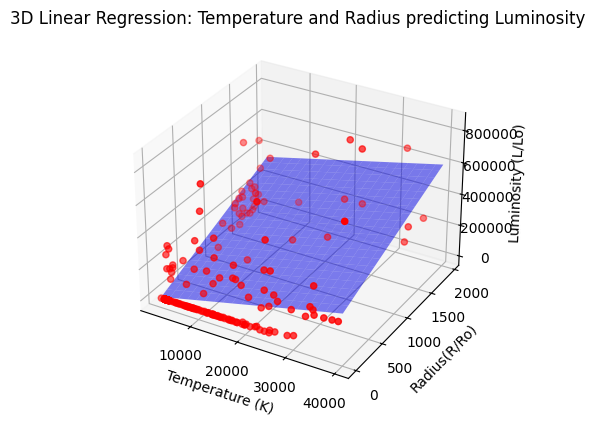

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the CSV file
df = pd.read_csv('6 class csv.csv')

# Selecting the features: Temperature and Radius, target: Luminosity
X = df[['Temperature (K)', 'Radius(R/Ro)']]
y = df['Luminosity(L/Lo)']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_scaled, y)

# Get the R² score of the model
r2_score = model.score(X_scaled, y)
print(f"R² value: {r2_score:.4f}")

# Create the mesh grid for plotting
x1_range = np.linspace(X['Temperature (K)'].min(), X['Temperature (K)'].max(), 100)
x2_range = np.linspace(X['Radius(R/Ro)'].min(), X['Radius(R/Ro)'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

# Scale the mesh grid values for Temperature and Radius separately
x1_scaled = scaler.transform(np.c_[x1.ravel(), np.zeros_like(x1.ravel())])[:, 0]  # Scale x1 only (Temperature)
x2_scaled = scaler.transform(np.c_[np.zeros_like(x2.ravel()), x2.ravel()])[:, 1]  # Scale x2 only (Radius)

# Predict values for the regression plane
x3 = model.intercept_ + model.coef_[0] * x1_scaled + model.coef_[1] * x2_scaled
x3 = x3.reshape(x1.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(X['Temperature (K)'], X['Radius(R/Ro)'], y, color='r', label='Actual data')

# Plot the regression plane
ax.plot_surface(x1, x2, x3, color='b', alpha=0.5, rstride=5, cstride=5)

# Labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Radius(R/Ro)')
ax.set_zlabel('Luminosity (L/Lo)')
ax.set_title('3D Linear Regression: Temperature and Radius predicting Luminosity')

# Show plot
plt.show()


  Preparing metadata (setup.py) ... done
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9886 sha256=fefaf5c4ac8e8b9b089fcc072d71f3187a40a18d805a4a1ff3f6e71dca2e6942
  Stored in directory: /root/.cache/pip/wheels/77/00/19/3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord
Coefficients: [5.62411705e-05 1.69109363e-05]


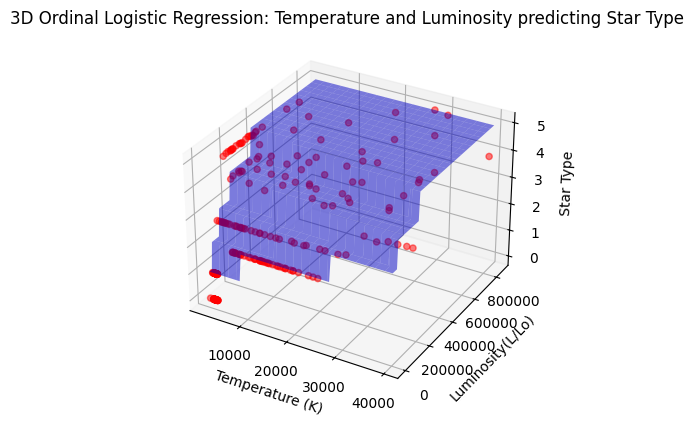

In [ ]:
# Ensure the mord package is installed
!pip install mord

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mord

# Load the CSV file
df = pd.read_csv('6 class csv.csv')

# Encode the star type as an ordinal categorical variable
df['Star type'] = pd.Categorical(df['Star type'], ordered=True)

# Selecting the features: Temperature and Luminosity, target: Star Type
X = df[['Temperature (K)', 'Luminosity(L/Lo)']]
y = df['Star type'].cat.codes  # Convert to numerical codes

# Fit the ordinal logistic regression model using mord
model = mord.LogisticAT()  # Using the Average Thresholds model
model.fit(X, y)

# Display coefficients (the model doesn't have intercept)
print("Coefficients:", model.coef_)

# Predict the star types for the input features
predictions = model.predict(X)

# Visualization of the relationships in a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a mesh grid for plotting
x1_range = np.linspace(X['Temperature (K)'].min(), X['Temperature (K)'].max(), 100)
x2_range = np.linspace(X['Luminosity(L/Lo)'].min(), X['Luminosity(L/Lo)'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

# Create a DataFrame for the mesh grid
grid_data = pd.DataFrame({'Temperature (K)': x1.ravel(), 'Luminosity(L/Lo)': x2.ravel()})

# Predict the star types for the grid data
grid_predictions = model.predict(grid_data)

# Reshape the predicted classes for plotting
grid_predictions = grid_predictions.reshape(x1.shape)

# Create a 3D plot
ax.scatter(X['Temperature (K)'], X['Luminosity(L/Lo)'], y, color='r', label='Actual data', alpha=0.5)
ax.plot_surface(x1, x2, grid_predictions, color='b', alpha=0.5, rstride=5, cstride=5)

# Labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Luminosity(L/Lo)')
ax.set_zlabel('Star Type')
ax.set_title('3D Ordinal Logistic Regression: Temperature and Luminosity predicting Star Type')

# Show plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import sympy

# Load the CSV file
data = pd.read_csv('6 class csv.csv')

# Define function to calculate omega(n) - number of distinct prime factors
def omega(n):
    return len(sympy.factorint(n))

# Define Erdős–Kac normalization for temperature values
def erdos_kac_normalization(temp_column):
    # Apply the Erdős–Kac theorem normalization
    omega_values = temp_column.apply(omega)
    mean = np.log(np.log(temp_column))
    std_dev = np.sqrt(np.log(np.log(temp_column)))
    normalized_temp = (omega_values - mean) / std_dev
    return normalized_temp

# Apply normalization to Temperature (K) column and save to an array
normalized_temperature_array = erdos_kac_normalization(data['Temperature (K)']).to_numpy()

print("Normalized temperature values stored in array:", normalized_temperature_array)


Normalized temperature values stored in array: [ 0.6353394   0.63623624  0.65304578  0.64504818 -0.01699787  0.6435304
 -0.044546    0.65304578  0.65097916  0.64895858  0.61875312  0.6332703
 -0.05932759 -0.07149652  0.65097916  0.62646669 -0.04970359  0.6161806
  1.32323614  0.6233883  -0.20713417  1.22106323  0.55190116  0.53735005
  1.1452453   1.16821063  0.53662917  1.22161547  1.17776762  1.22836726
  1.06917739  0.43667568  1.15255234  0.52585936  0.57206564  1.21686722
 -0.11985351  1.24199418  0.56989556 -0.10560983 -0.07583554 -0.06528046
  1.32022423 -0.06108005 -0.05585741  0.61875312  0.61946565 -0.07026453
 -0.07142865  0.42819667  0.62193321  0.61459752  0.61235546 -0.07418029
  0.61734547  1.31358882  1.30634981  1.31358882  0.61454345  0.62061809
 -0.0646848   1.3142336  -0.05514842  0.64371873 -0.0537672  -0.06352886
  0.63966448 -0.05025472  0.64604867  0.64237154  0.62631171 -0.76059465
  0.62759076  1.32489453  0.62018412  1.3237073   0.64166862  0.62640467
 -0.740

In [ ]:
import pandas as pd
import numpy as np
import sympy
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the CSV file
data = pd.read_csv('6 class csv.csv')

# Define function to calculate omega(n) - number of distinct prime factors
def omega(n):
    return len(sympy.factorint(n))

# Define Erdős–Kac normalization for temperature values
def erdos_kac_normalization(temp_column):
    omega_values = temp_column.apply(omega)
    mean = np.log(np.log(temp_column))
    std_dev = np.sqrt(np.log(np.log(temp_column)))
    normalized_temp = (omega_values - mean) / std_dev
    return normalized_temp

# Apply normalization to Temperature (K) column
data['Normalized_Temperature'] = erdos_kac_normalization(data['Temperature (K)'])

# Perform ANOVA to check for significance
grouped_temperatures = [group['Normalized_Temperature'].values for _, group in data.groupby('Star type')]
anova_result = f_oneway(*grouped_temperatures)
# Calculate ANOVA table
group_means = [np.mean(group) for group in grouped_temperatures]
overall_mean = np.mean(data['Normalized_Temperature'])
SS_between = sum(len(group) * (mean - overall_mean) ** 2 for group, mean in zip(grouped_temperatures, group_means))
SS_within = sum(sum((x - mean) ** 2 for x in group) for group, mean in zip(grouped_temperatures, group_means))
DF_between = len(grouped_temperatures) - 1
DF_within = len(data['Normalized_Temperature']) - len(grouped_temperatures)
MS_between = SS_between / DF_between
MS_within = SS_within / DF_within
F_statistic = MS_between / MS_within

# Print ANOVA table
anova_table = pd.DataFrame({
    "Source": ["Between Groups", "Within Groups", "Total"],
    "Sum of Squares (SS)": [SS_between, SS_within, SS_between + SS_within],
    "Degrees of Freedom (DF)": [DF_between, DF_within, DF_between + DF_within],
    "Mean Square (MS)": [MS_between, MS_within, None],
    "F": [F_statistic, None, None],
    "p-value": [anova_result.pvalue, None, None]
})

print("\nANOVA Table:")
print(anova_table)


if anova_result.pvalue < 0.05:
    print("The normalized temperature mean differs across star types (p < 0.05). Proceeding with post-hoc test.")

    # Perform Tukey HSD post-hoc test
    tukey_result = pairwise_tukeyhsd(endog=data['Normalized_Temperature'], groups=data['Star type'], alpha=0.05)
    print("\nTukey HSD Test Results:")
    print(tukey_result)

    # Display which groups' means differ
    print("\nSignificant Differences Between Star Types:")
    tukey_summary = tukey_result.summary()
    for row in tukey_summary.data[1:]:  # skip header row
        if row[-1] == True:  # last column in summary is 'reject' for significance
            print(f"Star types {row[0]} and {row[1]} have significantly different means (p < 0.05).")

else:
    print("No significant difference found in ANOVA, post-hoc test not needed.")



ANOVA Table:
           Source  Sum of Squares (SS)  Degrees of Freedom (DF)  \
0  Between Groups             9.032250                        5   
1   Within Groups            68.272189                      234   
2           Total            77.304439                      239   

   Mean Square (MS)        F   p-value  
0          1.806450  6.19153  0.000021  
1          0.291761      NaN       NaN  
2               NaN      NaN       NaN  
The normalized temperature mean differs across star types (p < 0.05). Proceeding with post-hoc test.

Tukey HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.0601 0.9962  -0.287  0.4071  False
     0      2   0.4936 0.0008  0.1465  0.8406   True
     0      3   0.3782 0.0238  0.0312  0.7253   True
     0      4   -0.014    1.0 -0.3611   0.333  False
     0      5   0.2512 0.3015 -0.0959  0.5983  False
   